# ELO MERCHANT CATEGORY RECOMMENDATION 
### COMPETITION ON KAGGLE
## EDA OF train.csv AND test.csv
### 20-12-2018

In [49]:
## Variables specific for competition

ID = 'card_id'                                            
TARGET = 'target'    
##LOGTARGET = 'log_price_doc'
##LOGPV_PER_M2 = 'log_pv_price_per_m2'    # logarithm of the discounted value of the price per living area
##LOGDOLLARPRICE = 'log_dollar_price'     # logarithm of the dollar price
##LOGDOLLAR_PER_M2 = 'log_dollar_price_per_m2'   # logarithm of the dollar price of one sqr meter living area

RAW_DIRECTORY = 'C:/Users/judit/Documents/learning/kaggle/Elo_201812/rawdata/'  
DIRECTORY = 'C:/Users/judit/Documents/learning/kaggle/Elo_201812/data/'
HIST_TRANS_FILE = RAW_DIRECTORY + 'historical_transactions.csv'
MERCHANTS_FILE = RAW_DIRECTORY + 'merchants.csv'
NEW_MERCH_TRANS_FILE = RAW_DIRECTORY + 'new_merchant_transactions.csv'
TRAIN_FILE = RAW_DIRECTORY + 'train.csv'    
TEST_FILE = RAW_DIRECTORY +'test.csv'
SAMPLE_SUBMISSION_FILE = RAW_DIRECTORY + 'sample_submission.csv'
##MACRO_FILE = RAW_DIRECTORY + 'macro.csv'

# Before onehot encoding the common file of the train and test data 
# will be saved into this file:
##DATA_FILE = DIRECTORY + 'data.csv'                 
##DATA_ONEHOT = DIRECTORY + 'data_onehot.csv'        # includes onehot encoding

# The final training, validation and local test set will be saved into these files:
##TRAIN_ONEHOT = DIRECTORY + 'train_onehot.csv'         
##VALID_ONEHOT = DIRECTORY + 'valid_onehot.csv'        
##LOCALTEST_ONEHOT = DIRECTORY + 'localtest_onehot.csv'       # this is for local test
##TRAIN_PREPROCESSED = DIRECTORY + 'train_preprocessed.csv'
##VALID_PREPROCESSED = DIRECTORY + 'valid_preprocessed.csv'
##LOCALTEST_PREPROCESSED = DIRECTORY + 'localtest_preprocessed.csv'

# Dataset including training, validaton, and local test sets
##ALLTRAIN = DIRECTORY + 'alltrain.csv'                       # without one-hot encoding
##ALLTRAIN_ONEHOT = DIRECTORY + 'alltrain_onehot.csv'         # with one-hot encoding

# The predictions will be made for this dataset:
##TEST_PREPROCESSED = DIRECTORY + 'test_preprocessed.csv'     # without one-hot encoding
##TEST_ONEHOT = DIRECTORY + 'test_onehot.csv'                 # with one-hot encoding

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import missingno
import pickle

random.seed(1)

In [51]:
train = pd.read_csv(TRAIN_FILE)
test = pd.read_csv(TEST_FILE)

In [52]:
train.head()

first_active_month          card_id  feature_1  feature_2  feature_3  \
0            2017-06  C_ID_92a2005557          5          2          1   
1            2017-01  C_ID_3d0044924f          4          1          0   
2            2016-08  C_ID_d639edf6cd          2          2          0   
3            2017-09  C_ID_186d6a6901          4          3          0   
4            2017-11  C_ID_cdbd2c0db2          1          3          0   

     target  
0 -0.820283  
1  0.392913  
2  0.688056  
3  0.142495  
4 -0.159749

In [53]:
for idx in range(len(train.columns)):
    print(train.dtypes[idx], ' '*6, train.columns[idx])

object        first_active_month
object        card_id
int64        feature_1
int64        feature_2
int64        feature_3
float64        target


In [54]:
test.head()

first_active_month          card_id  feature_1  feature_2  feature_3
0            2017-04  C_ID_0ab67a22ab          3          3          1
1            2017-01  C_ID_130fd0cbdd          2          3          0
2            2017-08  C_ID_b709037bc5          5          1          1
3            2017-12  C_ID_d27d835a9f          2          1          0
4            2015-12  C_ID_2b5e3df5c2          5          1          1

In [55]:
for idx in range(len(test.columns)):
    print(test.dtypes[idx], ' '*6, test.columns[idx])

object        first_active_month
object        card_id
int64        feature_1
int64        feature_2
int64        feature_3


In [56]:
train.shape, test.shape

((201917, 6), (123623, 5))

In [57]:
train['start_year'] = train['first_active_month'].apply(lambda x : int(x[:4]))
train['start_month'] = train['first_active_month'].apply(lambda x : int(x[5:]))
train.head()

first_active_month          card_id  feature_1  feature_2  feature_3  \
0            2017-06  C_ID_92a2005557          5          2          1   
1            2017-01  C_ID_3d0044924f          4          1          0   
2            2016-08  C_ID_d639edf6cd          2          2          0   
3            2017-09  C_ID_186d6a6901          4          3          0   
4            2017-11  C_ID_cdbd2c0db2          1          3          0   

     target  start_year  start_month  
0 -0.820283        2017            6  
1  0.392913        2017            1  
2  0.688056        2016            8  
3  0.142495        2017            9  
4 -0.159749        2017           11

In [58]:
# number of month from 'first_activate_month' till 2019-01-01
train['num_months'] = (2018 - train['start_year']) * 12 + (13 - train['start_month'])

In [59]:
train.head()

first_active_month          card_id  feature_1  feature_2  feature_3  \
0            2017-06  C_ID_92a2005557          5          2          1   
1            2017-01  C_ID_3d0044924f          4          1          0   
2            2016-08  C_ID_d639edf6cd          2          2          0   
3            2017-09  C_ID_186d6a6901          4          3          0   
4            2017-11  C_ID_cdbd2c0db2          1          3          0   

     target  start_year  start_month  num_months  
0 -0.820283        2017            6          19  
1  0.392913        2017            1          24  
2  0.688056        2016            8          29  
3  0.142495        2017            9          16  
4 -0.159749        2017           11          14

In [60]:
# print rows with missing 'first_activate_month'
test[test['first_active_month'].isnull()]

first_active_month          card_id  feature_1  feature_2  feature_3
11578                NaN  C_ID_c27b4f80f7          5          2          1

In [61]:
test['start_year'] = test['first_active_month'].map(lambda x : int(str(x)[:4]) if pd.notnull(x) else x)
test['start_month'] = test['first_active_month'].map(lambda x : int(str(x)[5:]) if pd.notnull(x) else x)
test['num_months'] = (2018 - test['start_year']) * 12 + (13 - test['start_month'])
test.head()

first_active_month          card_id  feature_1  feature_2  feature_3  \
0            2017-04  C_ID_0ab67a22ab          3          3          1   
1            2017-01  C_ID_130fd0cbdd          2          3          0   
2            2017-08  C_ID_b709037bc5          5          1          1   
3            2017-12  C_ID_d27d835a9f          2          1          0   
4            2015-12  C_ID_2b5e3df5c2          5          1          1   

   start_year  start_month  num_months  
0      2017.0          4.0        21.0  
1      2017.0          1.0        24.0  
2      2017.0          8.0        17.0  
3      2017.0         12.0        13.0  
4      2015.0         12.0        37.0

In [62]:
test.iloc[11578]

first_active_month                NaN
card_id               C_ID_c27b4f80f7
feature_1                           5
feature_2                           2
feature_3                           1
start_year                        NaN
start_month                       NaN
num_months                        NaN
Name: 11578, dtype: object

In [63]:
#test['num_months'] = test['num_months'].fillna(999)
#test.iloc[11578]

In [64]:
test['num_months'].describe()

count    123622.000000
mean         23.481363
std           9.608806
min          12.000000
25%          16.000000
50%          21.000000
75%          27.000000
max          86.000000
Name: num_months, dtype: float64

In [65]:
train['num_months'].describe()

count    201917.000000
mean         23.509675
std           9.646787
min          11.000000
25%          16.000000
50%          21.000000
75%          27.000000
max          86.000000
Name: num_months, dtype: float64

In [66]:
train['istrain'] = 1
test['istrain'] = 0
data = pd.concat([train.copy(), test.copy()], ignore_index=True, sort = False)
data.shape

(325540, 10)

In [67]:
data.head()

first_active_month          card_id  feature_1  feature_2  feature_3  \
0            2017-06  C_ID_92a2005557          5          2          1   
1            2017-01  C_ID_3d0044924f          4          1          0   
2            2016-08  C_ID_d639edf6cd          2          2          0   
3            2017-09  C_ID_186d6a6901          4          3          0   
4            2017-11  C_ID_cdbd2c0db2          1          3          0   

     target  start_year  start_month  num_months  istrain  
0 -0.820283      2017.0          6.0        19.0        1  
1  0.392913      2017.0          1.0        24.0        1  
2  0.688056      2016.0          8.0        29.0        1  
3  0.142495      2017.0          9.0        16.0        1  
4 -0.159749      2017.0         11.0        14.0        1

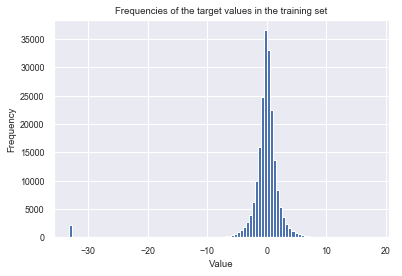

In [68]:
plt.hist(train[TARGET], bins = 100)
plt.title("Frequencies of the target values in the training set")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [69]:
train['target'].describe()

count    201917.000000
mean         -0.393636
std           3.850500
min         -33.219281
25%          -0.883110
50%          -0.023437
75%           0.765453
max          17.965068
Name: target, dtype: float64

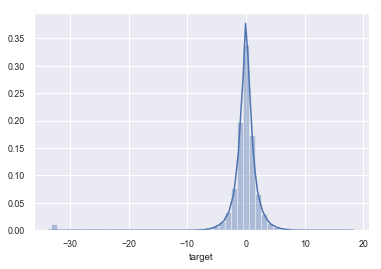

In [70]:
sns.distplot(train[TARGET])

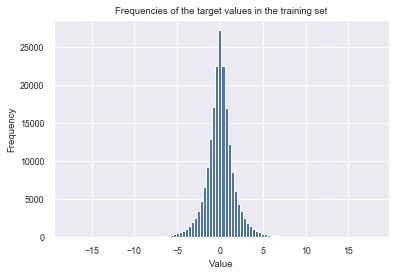

In [71]:
plt.hist(train.loc[train[TARGET] > -30, TARGET], bins = 100)
plt.title("Frequencies of the target values in the training set")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [72]:
train.loc[train[TARGET] > -30, TARGET].describe()

count    199710.000000
mean         -0.030879
std           1.717793
min         -17.608147
25%          -0.844513
50%          -0.007783
75%           0.777331
max          17.965068
Name: target, dtype: float64

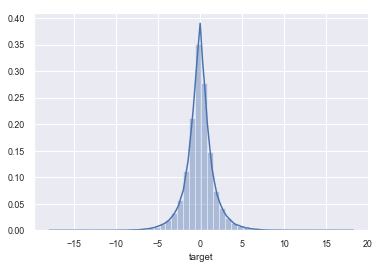

In [73]:
sns.distplot(train.loc[train[TARGET] > -30, TARGET])

## Separate numeric and categorical variables

In [74]:
# Find columns with numeric (int or float) values and nonnumeric (categorical) variables

nonnumeric_cols = data.dtypes[data.dtypes == 'object'].index.copy()
numeric_cols = data.dtypes[data.dtypes != 'object'].index.copy()
print(nonnumeric_cols)
print(numeric_cols)

Index(['first_active_month', 'card_id'], dtype='object')
Index(['feature_1', 'feature_2', 'feature_3', 'target', 'start_year',
       'start_month', 'num_months', 'istrain'],
      dtype='object')


In [75]:
## Number of variables with different dtypes
data.dtypes.value_counts()

float64    4
int64      4
object     2
dtype: int64

In [76]:
def describe_variable(dt):
    print('--------------------------------------------')
    for c in data.columns:
        if c != 'istrain':
            if data[c].dtype == dt:
                t1 = data[data['istrain'] == 1][c]
                t2 = data[data['istrain'] == 0][c]
                if dt == "object":
                    f1 = t1[pd.isnull(t1) == False].value_counts()
                    fp1 = 100 * t1[pd.isnull(t1) == False].value_counts() / sum(t1[pd.isnull(t1) == False].value_counts())
                    f2 = t2[pd.isnull(t2) == False].value_counts()
                    fp2 = 100 * t2[pd.isnull(t2) == False].value_counts() / sum(t2[pd.isnull(t2) == False].value_counts())
                    f = pd.concat([f1, fp1, f2, fp2], axis = 1, sort = False)
                    f.columns=['Train', 'Train percent', 'Test', 'Test percent']
                else:
                    f1 = t1[pd.isnull(t1) == False].describe()
                    f2 = t2[pd.isnull(t2) == False].describe()
                    f = pd.concat([f1, f2], axis = 1)
                    f.columns=['Train','Test']
                m1 = sum(t1.isnull())
                m2 = sum(t2.isnull())
                print(dt + ' - ' + c)
                print('Number of unique values - train: %d, test: %d' % (len(t1.value_counts()),
                                                                         len(t2.value_counts())))
                print('Number of missing values - train: %d, test: %d' %  (m1, m2))
                if dt == 'object':
                    print(f.sort_values(by = 'Train', ascending = False).iloc[:10])
                else:
                    print(f)
                
                if dt != "object":
                    if len(t1.value_counts())<=12:
                        c1 = t1.value_counts()
                        c2 = t2.value_counts()
                        p1 = 100. * c1 / sum(c1)
                        p2 = 100. * c2 / sum(c2)
                        c = pd.concat([c1, p1, c2, p2], axis=1)
                        c.columns=['Train', 'Train percent', 'Test', 'Test percent']
                        print(c)
                print('=' * 30)

In [77]:
set(train['card_id']).intersection(set(test['card_id']))

set()

In [78]:
ids = data['card_id'].apply(lambda x : x[5:])
ids[:5]

0    92a2005557
1    3d0044924f
2    d639edf6cd
3    186d6a6901
4    cdbd2c0db2
Name: card_id, dtype: object

In [79]:
ids.tolist()[:5]

['92a2005557', '3d0044924f', 'd639edf6cd', '186d6a6901', 'cdbd2c0db2']

In [80]:
ids_str = ''.join(ids.tolist())
ids_str[:30]

'92a20055573d0044924fd639edf6cd'

In [81]:
list(set(ids_str))

['8',
 'b',
 '3',
 '9',
 '4',
 'f',
 'd',
 '2',
 'a',
 '7',
 '6',
 'c',
 '1',
 'e',
 '5',
 '0']

In [82]:
# card_id is a hexadecimal!

In [83]:
data['card_id_decimal'] = data['card_id'].apply(lambda s : int(s[5:], 16))
data.head()

first_active_month          card_id  feature_1  feature_2  feature_3  \
0            2017-06  C_ID_92a2005557          5          2          1   
1            2017-01  C_ID_3d0044924f          4          1          0   
2            2016-08  C_ID_d639edf6cd          2          2          0   
3            2017-09  C_ID_186d6a6901          4          3          0   
4            2017-11  C_ID_cdbd2c0db2          1          3          0   

     target  start_year  start_month  num_months  istrain  card_id_decimal  
0 -0.820283      2017.0          6.0        19.0        1     629783156055  
1  0.392913      2017.0          1.0        24.0        1     261997498959  
2  0.688056      2016.0          8.0        29.0        1     920094897869  
3  0.142495      2017.0          9.0        16.0        1     104914905345  
4 -0.159749      2017.0         11.0        14.0        1     883642076594

In [84]:
data['card_id_decimal'].describe()

count    3.255400e+05
mean     5.496844e+11
std      3.175903e+11
min      7.377857e+06
25%      2.741702e+11
50%      5.495988e+11
75%      8.244829e+11
max      1.099511e+12
Name: card_id_decimal, dtype: float64

In [85]:
data['feat_comb'] = data.apply(lambda row : (row['feature_1'] - 1) * 6 + (row['feature_2'] - 1) * 2 + row['feature_3'], axis = 1)
data.head()

first_active_month          card_id  feature_1  feature_2  feature_3  \
0            2017-06  C_ID_92a2005557          5          2          1   
1            2017-01  C_ID_3d0044924f          4          1          0   
2            2016-08  C_ID_d639edf6cd          2          2          0   
3            2017-09  C_ID_186d6a6901          4          3          0   
4            2017-11  C_ID_cdbd2c0db2          1          3          0   

     target  start_year  start_month  num_months  istrain  card_id_decimal  \
0 -0.820283      2017.0          6.0        19.0        1     629783156055   
1  0.392913      2017.0          1.0        24.0        1     261997498959   
2  0.688056      2016.0          8.0        29.0        1     920094897869   
3  0.142495      2017.0          9.0        16.0        1     104914905345   
4 -0.159749      2017.0         11.0        14.0        1     883642076594   

   feat_comb  
0         27  
1         18  
2          8  
3         22  
4          4

In [86]:
describe_variable('int64')

--------------------------------------------
int64 - feature_1
Number of unique values - train: 5, test: 5
Number of missing values - train: 0, test: 0
               Train          Test
count  201917.000000  123623.00000
mean        3.105311       3.10926
std         1.186160       1.18911
min         1.000000       1.00000
25%         2.000000       2.00000
50%         3.000000       3.00000
75%         4.000000       4.00000
max         5.000000       5.00000
   Train  Train percent   Test  Test percent
3  73573      36.437249  44719     36.173689
2  55797      27.633632  34115     27.595998
5  40625      20.119653  25051     20.264029
4  19885       9.848106  12332      9.975490
1  12037       5.961360   7406      5.990795
int64 - feature_2
Number of unique values - train: 3, test: 3
Number of missing values - train: 0, test: 0
               Train           Test
count  201917.000000  123623.000000
mean        1.745410       1.741796
std         0.751362       0.749195
min         

In [87]:
describe_variable('float64')

--------------------------------------------
float64 - target
Number of unique values - train: 197110, test: 0
Number of missing values - train: 0, test: 123623
               Train  Test
count  201917.000000   0.0
mean       -0.393636   NaN
std         3.850500   NaN
min       -33.219281   NaN
25%        -0.883110   NaN
50%        -0.023437   NaN
75%         0.765453   NaN
max        17.965068   NaN
float64 - start_year
Number of unique values - train: 8, test: 8
Number of missing values - train: 0, test: 1
               Train           Test
count  201917.000000  123622.000000
mean     2016.509298    2016.511406
std         0.788199       0.785047
min      2011.000000    2011.000000
25%      2016.000000    2016.000000
50%      2017.000000    2017.000000
75%      2017.000000    2017.000000
max      2018.000000    2018.000000
         Train  Train percent   Test  Test percent
2017.0  130519      64.639926  79990     64.705311
2016.0   51277      25.395088  31395     25.395965
2015.0   

In [88]:
describe_variable('object')

--------------------------------------------
object - first_active_month
Number of unique values - train: 75, test: 75
Number of missing values - train: 0, test: 1
           Train  Train percent    Test  Test percent
2017-09  13878.0       6.873121  8805.0      7.122519
2017-10  13695.0       6.782490  8451.0      6.836162
2017-08  13638.0       6.754260  8299.0      6.713206
2017-11  12930.0       6.403621  7807.0      6.315219
2017-07  12363.0       6.122813  7344.0      5.940690
2017-12  10170.0       5.036723  6233.0      5.041983
2017-06   9930.0       4.917862  6147.0      4.972416
2017-01   9605.0       4.756905  5974.0      4.832473
2016-12   9403.0       4.656864  5751.0      4.652085
2017-05   9168.0       4.540480  5598.0      4.528320
object - card_id
Number of unique values - train: 201917, test: 123623
Number of missing values - train: 0, test: 0
                 Train  Train percent  Test  Test percent
C_ID_802aa81166    1.0       0.000495   NaN           NaN
C_ID_4a29c

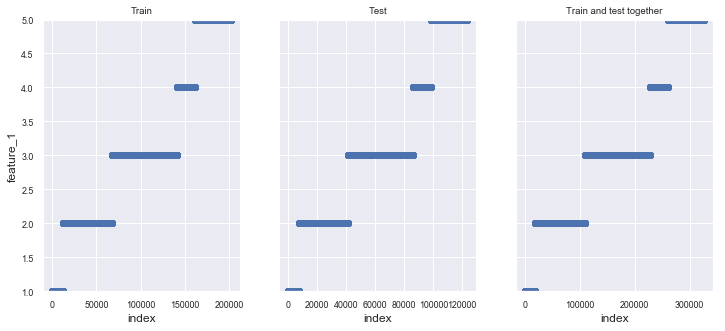

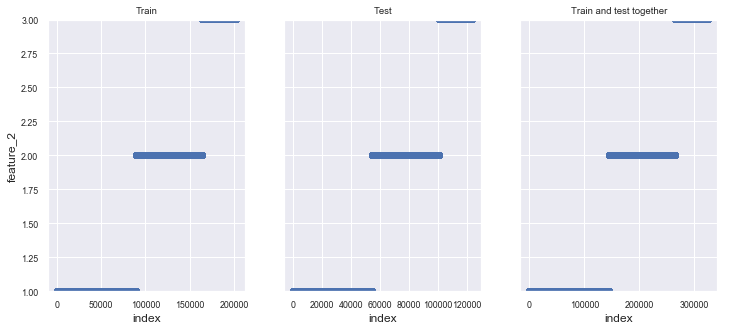

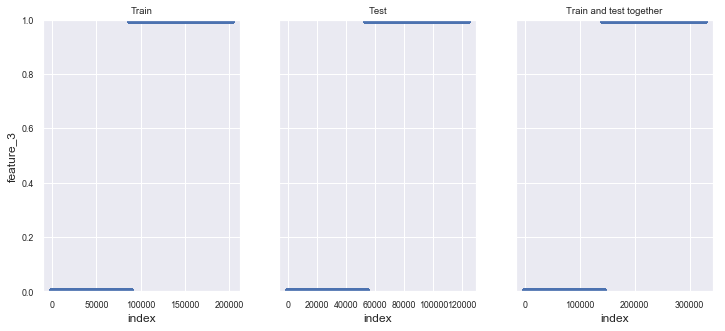

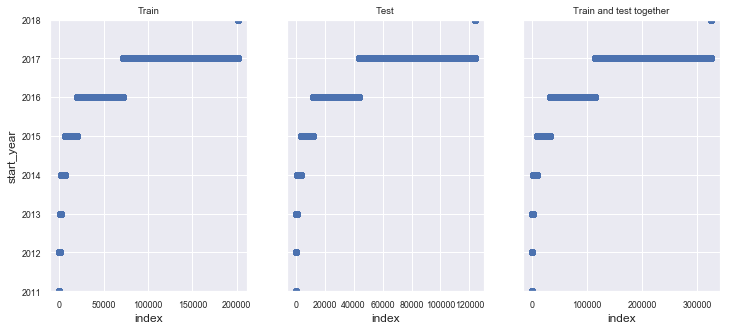

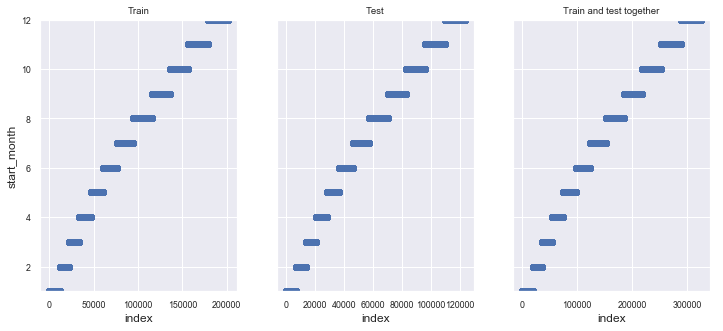

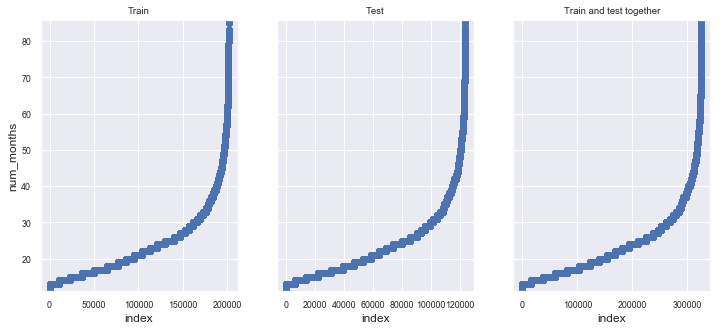

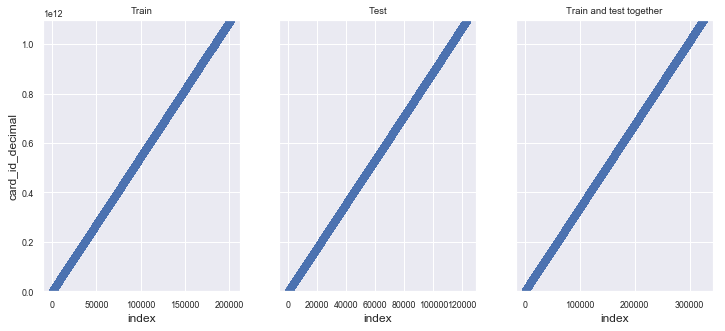

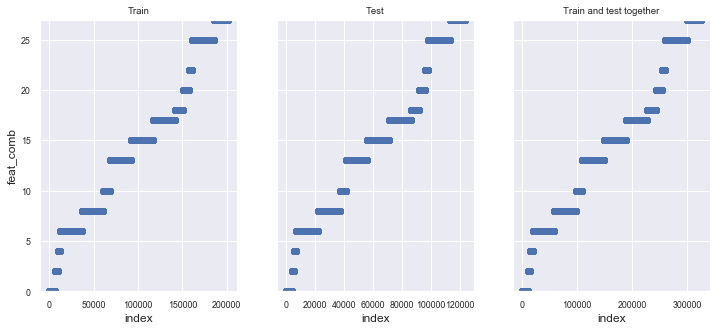

In [89]:
# Check for outliers
def scatterplots(trainframe, testframe, dataframe):
    for c in data.columns:
        if c not in ['istrain', TARGET]:
            if data[c].dtype != 'object':
                minval = min(dataframe[c])
                maxval = max(dataframe[c])
                fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, sharey = True, 
                                                    figsize = (12, 5))
                ax1.scatter(range(trainframe.shape[0]), np.sort(trainframe[c].values))
                ax2.scatter(range(testframe.shape[0]), np.sort(testframe[c].values))
                ax3.scatter(range(dataframe.shape[0]), np.sort(dataframe[c].values))
                ax1.set_ylim([minval, maxval])
                ax2.set_ylim([minval, maxval])
                ax3.set_ylim([minval, maxval])
                ax1.set_title('Train')
                ax2.set_title('Test')
                ax3.set_title('Train and test together')
                ax1.set_xlabel('index', fontsize = 12)
                ax2.set_xlabel('index', fontsize = 12)
                ax3.set_xlabel('index', fontsize = 12)
                ax1.set_ylabel(c, fontsize = 12)
                fig.show

## uncomment the next line for the scatter plots
scatterplots(data[data['istrain'] == 1], data[data['istrain'] == 0], data)

## Correlation

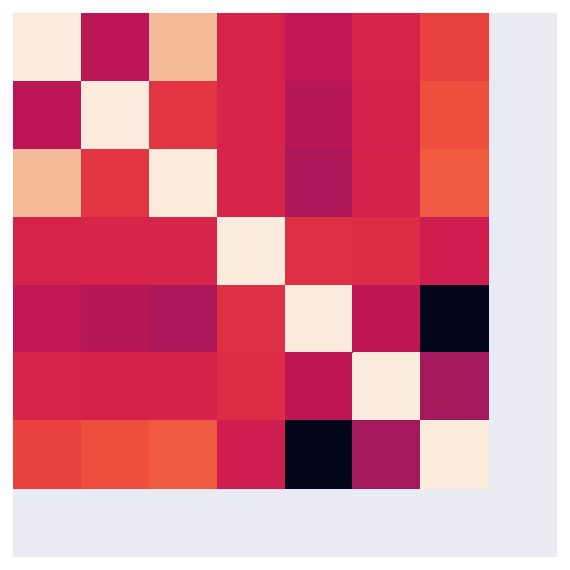

In [90]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.8, square=True,xticklabels=False,yticklabels=False,cbar=False)

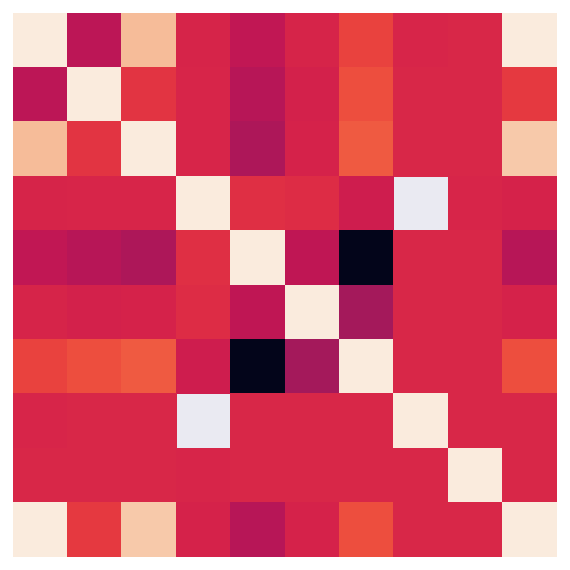

In [91]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.8, square=True,xticklabels=False,yticklabels=False,cbar=False)

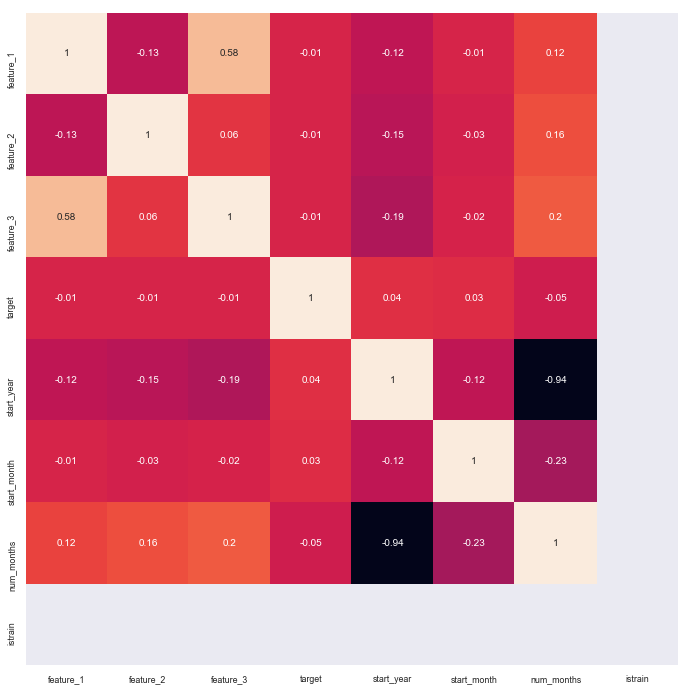

In [92]:
corrmat = train.corr().round(decimals = 2)
f, ax = plt.subplots(figsize = (12, 12))
sns.heatmap(corrmat, vmax = .8, square=True,xticklabels=True,yticklabels=True,cbar=False,annot=True)
sns.set(font_scale = 0.8)

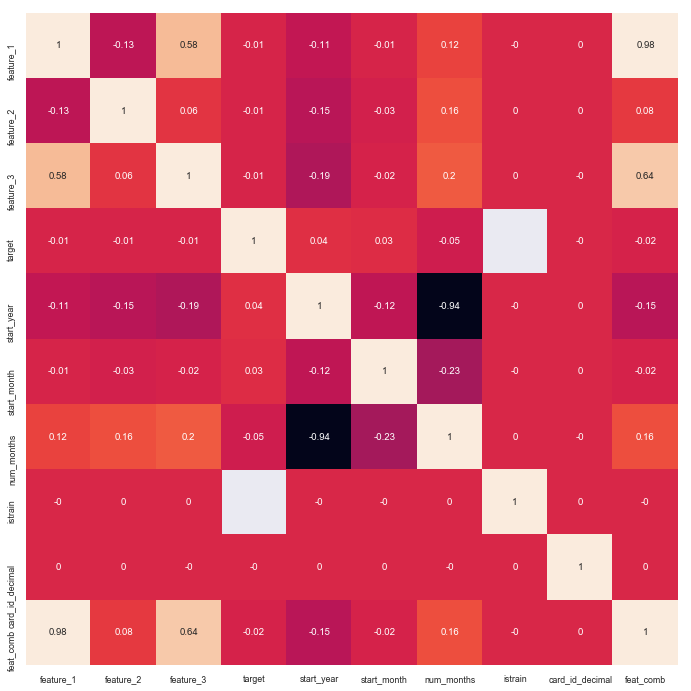

In [93]:
corrmat = data.corr().round(decimals = 2)
f, ax = plt.subplots(figsize = (12, 12))
sns.heatmap(corrmat, vmax = .8, square=True,xticklabels=True,yticklabels=True,cbar=False,annot=True)
sns.set(font_scale = 0.8)

In [94]:
# Calculate the variable inflation factor for the numerical variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
def find_multicollinearity(X, thresh = 5.0):
    '''X - pandas dataframe'''
    variables = list(X.columns)
    #num_var = len(variables)
    vif = [variance_inflation_factor(X.as_matrix(), ix) for ix in range(X.shape[1])]
    columns_with_high_vif = []
    i = 1
    while max(vif) > thresh:
        print(i)
        maxloc = vif.index(max(vif))
        print('dropping ', X.columns[maxloc], ' with vif: ', vif[maxloc])
        columns_with_high_vif.append(X.columns[maxloc])
        variables.pop(maxloc)
        X = X[variables]
        vif = [variance_inflation_factor(X.as_matrix(), ix) for ix in range(X.shape[1])]
        i = i + 1
    print('Remaining variables:')
    print(X[variables].columns)
    return X, columns_with_high_vif

col_sel = data.columns[data.dtypes == 'int64'].append(data.columns[data.dtypes == 'float64'])
mytrain = data[data['istrain'] == 1]
X = mytrain[col_sel].dropna()
print(X.shape)

Y, columns_with_high_vif = find_multicollinearity(X)

(201917, 10)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


1
dropping  feature_1  with vif:  18244572030.2


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


2
dropping  start_year  with vif:  49057.5915673
Remaining variables:
Index(['feature_2', 'feature_3', 'istrain', 'card_id_decimal', 'feat_comb',
       'target', 'start_month', 'num_months'],
      dtype='object')


In [95]:
# drop feat_comb and num_months
col_sel = data.columns[data.dtypes == 'int64'].append(data.columns[data.dtypes == 'float64'])
mytrain = data[data['istrain'] == 1]
X = mytrain[col_sel].dropna().drop(['feat_comb', 'num_months'], axis = 1)
print(X.shape)

Y, columns_with_high_vif = find_multicollinearity(X)

(201917, 8)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Remaining variables:
Index(['feature_1', 'feature_2', 'feature_3', 'istrain', 'card_id_decimal',
       'target', 'start_year', 'start_month'],
      dtype='object')


In [97]:
Y, columns_with_high_vif = find_multicollinearity(X, thresh = 1.1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


1
dropping  feature_1  with vif:  1.58208320274


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Remaining variables:
Index(['feature_2', 'feature_3', 'istrain', 'card_id_decimal', 'target',
       'start_year', 'start_month'],
      dtype='object')


## Features vs. target

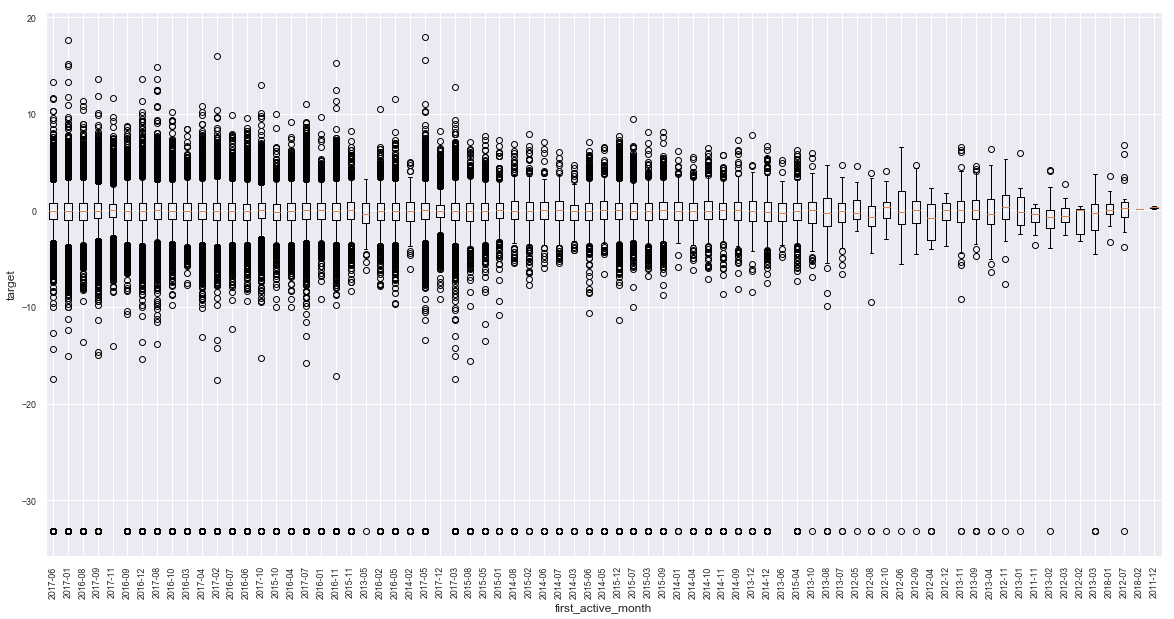

In [102]:
## Categorical variables
mytrain = data[data['istrain'] == 1].copy()
sel_cols = mytrain.columns[mytrain.dtypes == 'object']
sel_cols = [t for t in sel_cols if t not in [ID, TARGET]] 

for col in sel_cols:
    vals = mytrain[col].unique()
    target_for_boxplot = []
    for val in vals:
        data_to_add = mytrain[mytrain[col] == val].copy()
        target_to_add = data_to_add[TARGET]
        target_for_boxplot.append(target_to_add)
    fig, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = (20, 10))
    ax1.boxplot(target_for_boxplot)
    ax1.set_xlabel(col, fontsize = 12)
    ax1.set_xticklabels(vals, rotation = 90)
    ax1.set_ylabel(TARGET, fontsize = 12)
    fig.show

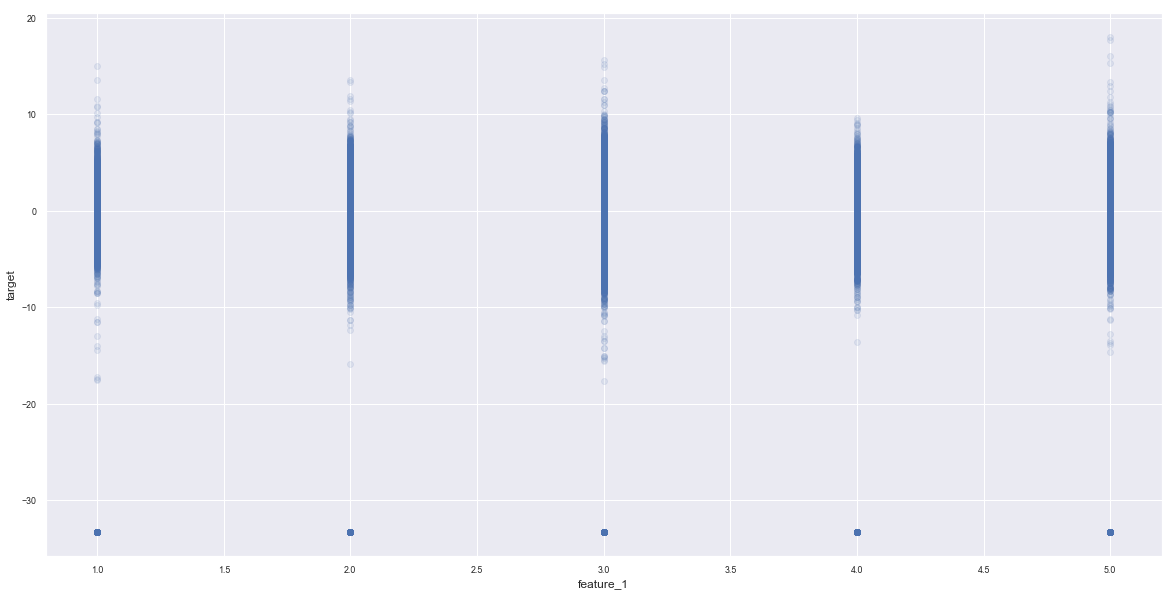

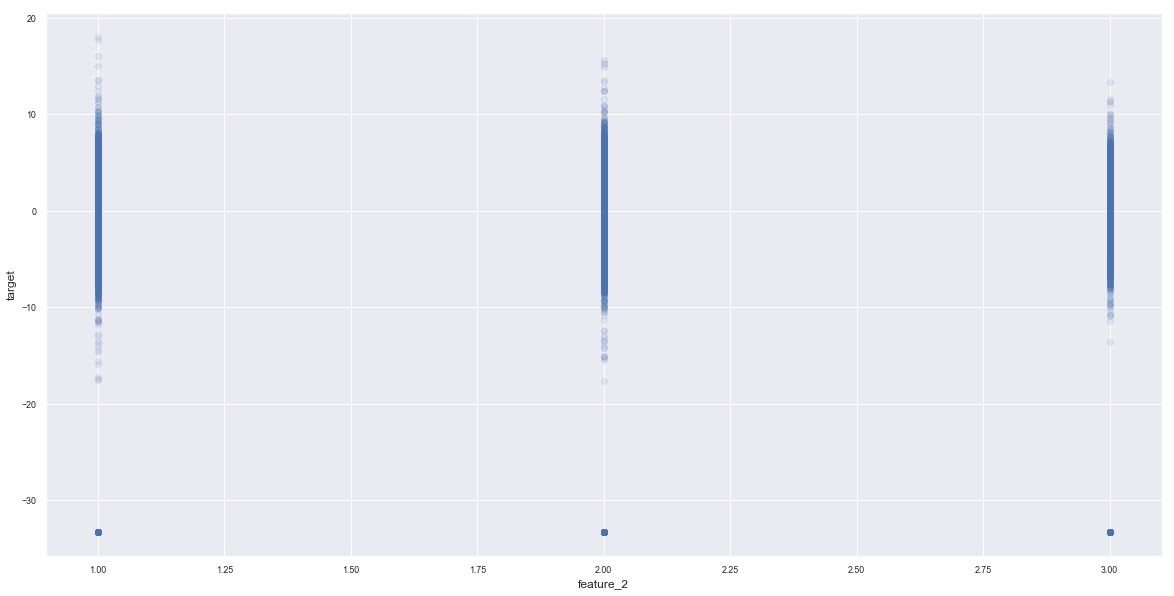

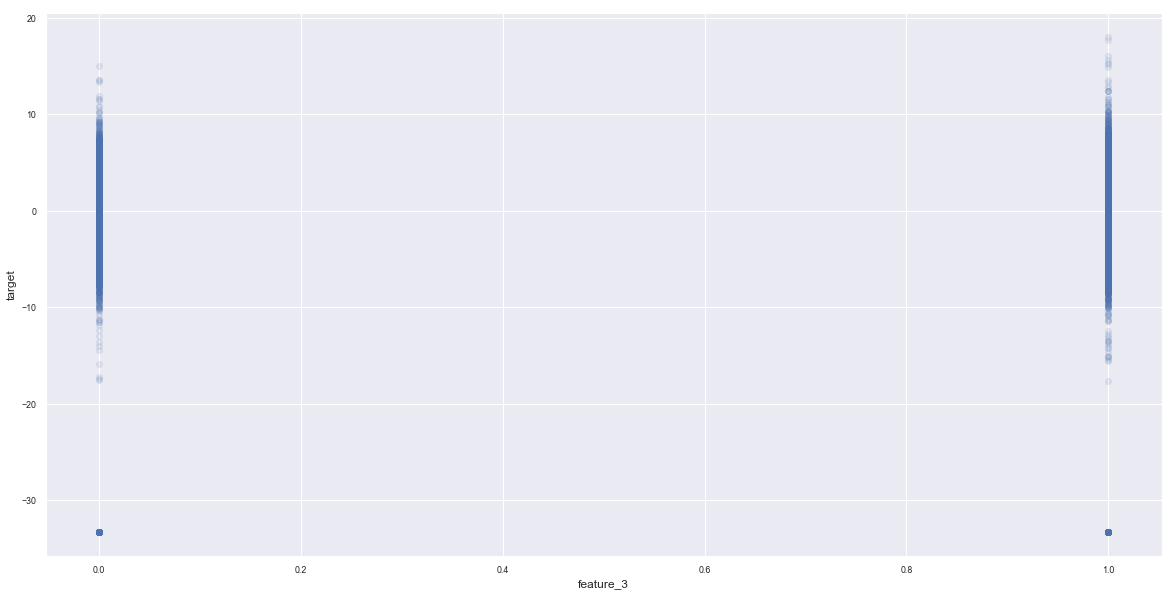

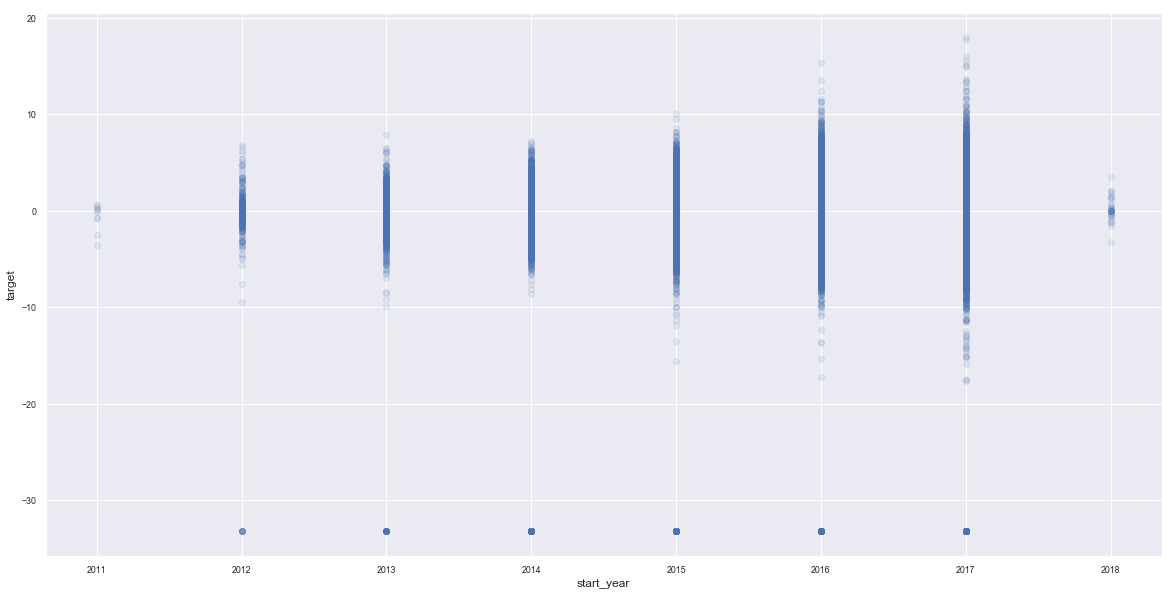

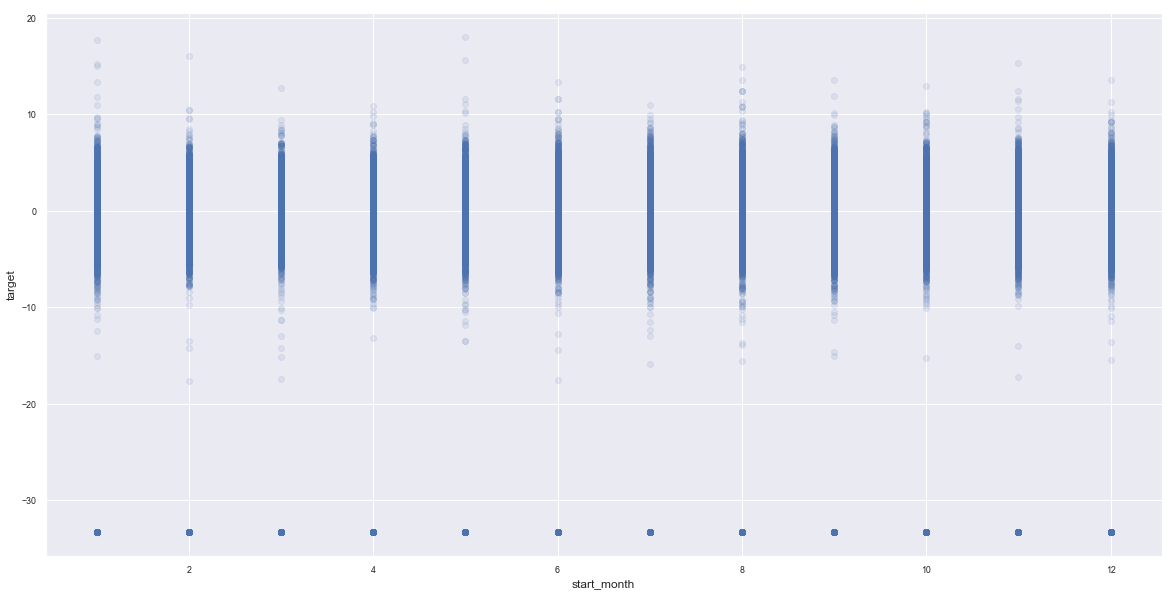

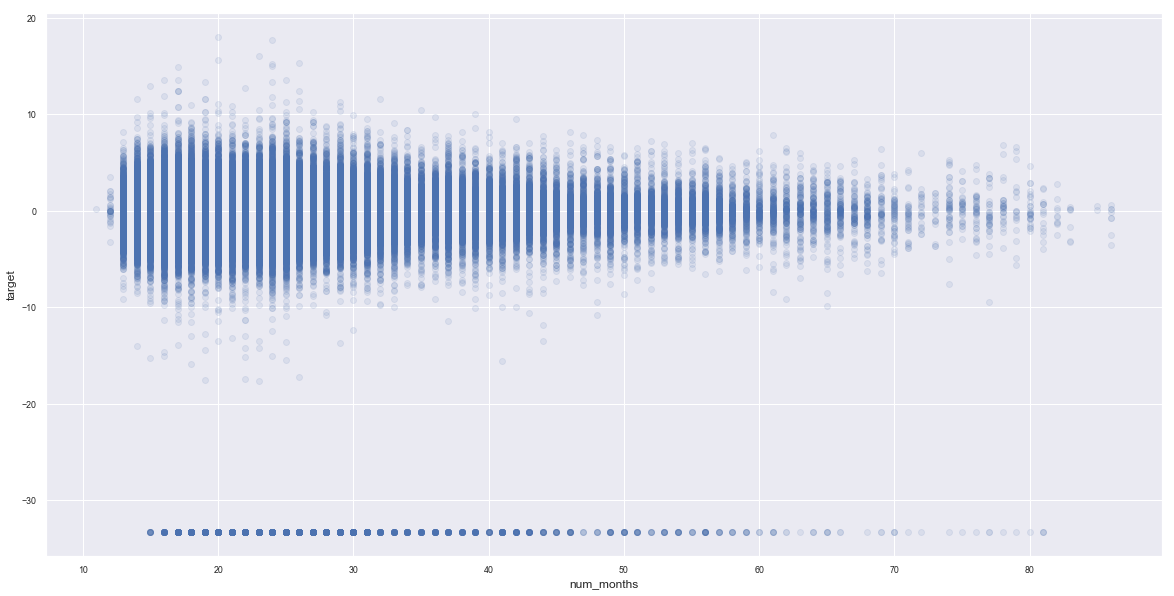

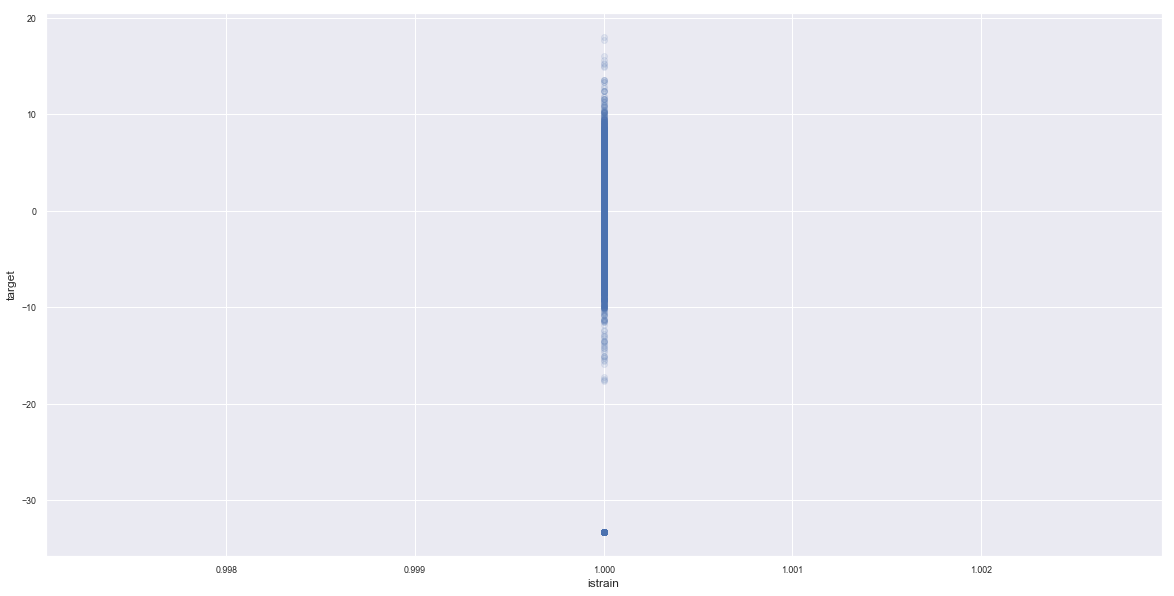

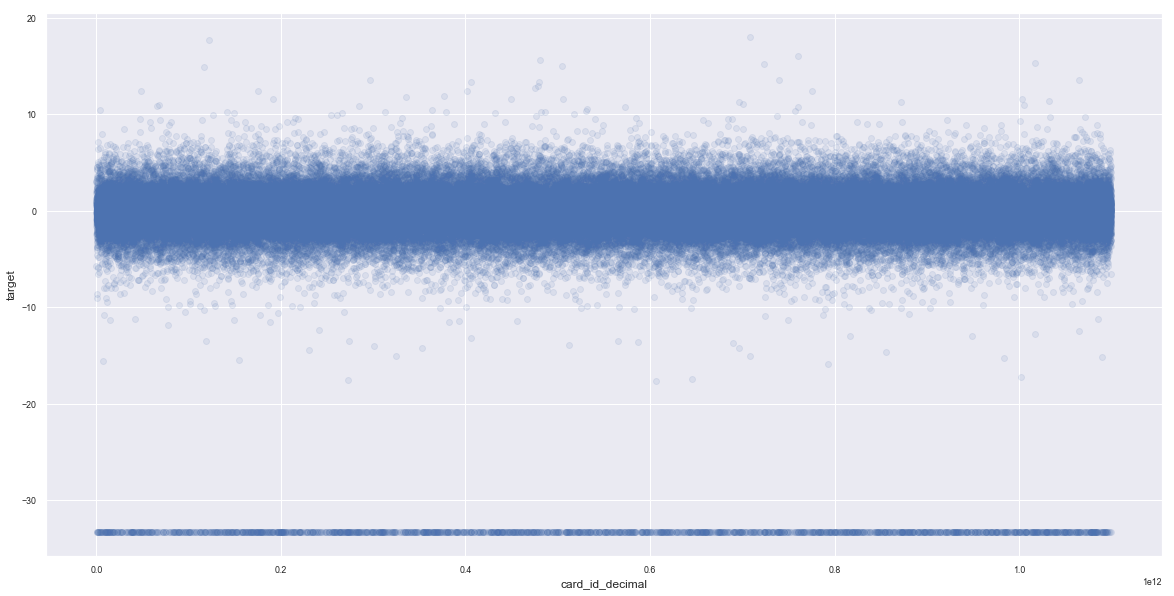

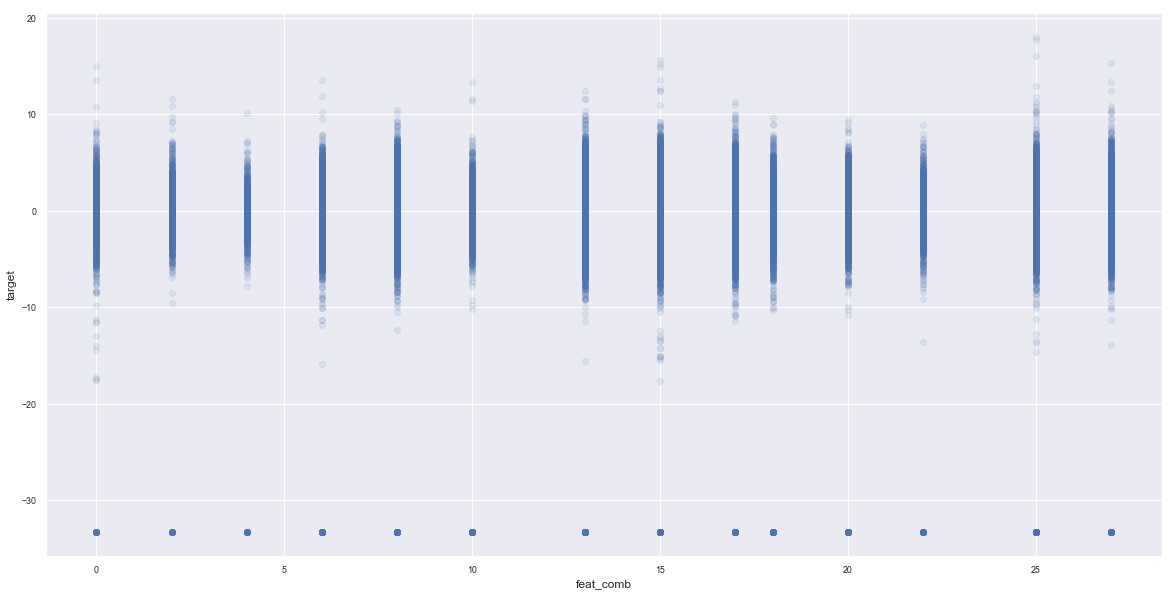

In [104]:
## Numerical variables (both int64 and float64)
sel_cols = mytrain.columns[mytrain.dtypes != 'object']
sel_cols = [t for t in sel_cols if t not in [ID, TARGET]] 

for col in sel_cols:
    fig, ax1 = plt.subplots(nrows = 1, ncols = 1, sharey = True, figsize = (20, 10))
    ax1.scatter(mytrain[col], mytrain[TARGET], alpha = 0.1)
    ax1.set_xlabel(col, fontsize = 12)
    ax1.set_ylabel(TARGET, fontsize = 12)
    fig.show

In [105]:
target_min = min(data[TARGET])
target_min

-33.21928095

In [106]:
min(data.loc[data[TARGET] > target_min, TARGET])

-17.60814651

In [115]:
for i in range(1000000000):
    prod = -i * target_min
    _, d = divmod(prod, 1)
    if d < 0.000001:
        print(i, prod)
    if d > 0.999999:
        print(i, prod)

0 -0.0
580210 19274158.999999497
1361769 45236987.000000544
1941979 64511146.000000045
2522189 83785304.99999954
3102399 103059463.99999905
3303748 109748133.0000006
3883958 129022292.00000009
4464168 148296450.99999958
5044378 167570609.99999908
5245727 174259279.00000063
5825937 193533438.00000015
6406147 212807596.99999964
6986357 232081755.99999914
7187706 238770425.0000007
7767916 258044584.00000018
8348126 277318742.9999997
8928336 296592901.99999917
9129685 303281571.0000007
9709895 322555730.00000024
10290105 341829888.9999997
10870315 361104047.9999992
11071664 367792717.0000008
11651874 387066876.0000003
12232084 406341034.99999976
12812294 425615193.9999993
13013643 432303863.00000083
13593853 451578022.0000003
14174063 470852180.9999998
14754273 490126339.99999934
14955622 496815009.0000009
15535832 516089168.00000036
16116042 535363326.9999999
16696252 554637485.9999994
16897601 561326155.000001
17477811 580600314.0000005
18058021 599874472.9999999
18638231 619148631.99999

135334483 4495714212.999999
135535832 4502402882.0
136116042 4521677041.0
136317391 4528365710.000001
136696252 4540951199.999999
136897601 4547639869.000001
137276462 4560225358.999999
137477811 4566914028.0
138058021 4586188187.0
138259370 4592876856.000001
138638231 4605462345.999999
138839580 4612151015.000001
139218441 4624736504.999999
139419790 4631425174.0
140000000 4650699333.0
140201349 4657388002.000001
140580210 4669973491.999999
140781559 4676662161.000001
141160420 4689247650.999999
141361769 4695936320.0
141941979 4715210479.0
142143328 4721899148.000001
142522189 4734484637.999999
142723538 4741173307.000001
143102399 4753758796.999999
143303748 4760447466.0
143883958 4779721625.0
144085307 4786410294.000001
144464168 4798995783.999999
144665517 4805684453.000001
145044378 4818269942.999999
145245727 4824958612.0
145825937 4844232771.0
146027286 4850921440.000001
146406147 4863506929.999999
146607496 4870195599.000001
146986357 4882781088.999999
147187706 4889469758.0
1

244464168 8120923878.999999
244665517 8127612548.000001
245044378 8140198037.999999
245245727 8146886707.0
245825937 8166160866.0
246027286 8172849535.000001
246406147 8185435024.999999
246607496 8192123694.000001
246986357 8204709183.999999
247187706 8211397853.0
247767916 8230672012.0
247969265 8237360681.000001
248348126 8249946170.999999
248549475 8256634840.000001
248928336 8269220329.999999
249129685 8275908999.0
249709895 8295183158.0
249911244 8301871827.000001
250290105 8314457316.999999
250491454 8321145986.000001
250870315 8333731475.999999
251071664 8340420145.0
251651874 8359694304.0
251853223 8366382973.000001
252232084 8378968462.999999
252433433 8385657132.000001
252812294 8398242621.999999
253013643 8404931291.0
253593853 8424205450.0
253795202 8430894119.000001
254174063 8443479608.999999
254375412 8450168278.000001
254754273 8462753767.999999
254955622 8469442437.0
255535832 8488716596.0
256116042 8507990754.999999
256317391 8514679424.000001
256696252 8527264913.999

416116042 13823075707.0
416317391 13829764376.0
416897601 13849038535.0
417477811 13868312694.0
418058021 13887586853.0
418259370 13894275522.0
418839580 13913549681.0
419419790 13932823840.0
420000000 13952097999.0
420201349 13958786668.0
420781559 13978060827.0
421361769 13997334986.0
421941979 14016609145.0
422143328 14023297814.0
422723538 14042571973.0
423303748 14061846132.0
423883958 14081120291.0
424085307 14087808960.0
424665517 14107083119.0
425245727 14126357278.0
425825937 14145631437.0
426027286 14152320106.0
426607496 14171594265.0
427187706 14190868424.0
427767916 14210142583.0
428549475 14236105411.0
429129685 14255379570.0
429709895 14274653729.0
430491454 14300616557.0
431071664 14319890716.0
431651874 14339164875.0
432433433 14365127703.0
433013643 14384401862.0
433593853 14403676021.0
434375412 14429638849.0
434955622 14448913008.0
435535832 14468187167.0
436116042 14487461326.0
436317391 14494149995.0
436897601 14513424154.0
437477811 14532698313.0
438058021 145519

556317391 18480463709.0
556696252 18493049199.0
556897601 18499737868.0
557098950 18506426537.0
557477811 18519012027.0
557679160 18525700696.0
558058021 18538286186.0
558259370 18544974855.0
558638231 18557560345.0
558839580 18564249014.0
559040929 18570937683.0
559419790 18583523173.0
559621139 18590211842.0
560000000 18602797332.0
560201349 18609486001.0
560580210 18622071491.0
560781559 18628760160.0
560982908 18635448829.0
561361769 18648034319.0
561563118 18654722988.0
561941979 18667308478.0
562143328 18673997147.0
562522189 18686582637.0
562723538 18693271306.0
562924887 18699959975.0
563303748 18712545465.0
563505097 18719234134.0
563883958 18731819624.0
564085307 18738508293.0
564464168 18751093783.0
564665517 18757782452.0
564866866 18764471121.0
565245727 18777056611.0
565447076 18783745280.0
565825937 18796330770.0
566027286 18803019439.0
566406147 18815604929.0
566607496 18822293598.0
566808845 18828982267.0
566986357 18834879088.0
567187706 18841567757.0
567389055 188482

646027286 21460561915.0
646406147 21473147405.0
646607496 21479836074.0
646808845 21486524743.0
647187706 21499110233.0
647389055 21505798902.0
647767916 21518384392.0
647969265 21525073061.0
648348126 21537658551.0
648549475 21544347220.0
648750824 21551035889.0
649129685 21563621379.0
649331034 21570310048.0
649709895 21582895538.0
649911244 21589584207.0
650290105 21602169697.0
650491454 21608858366.0
650692803 21615547035.0
651071664 21628132525.0
651273013 21634821194.0
651651874 21647406684.0
651853223 21654095353.0
652232084 21666680843.0
652433433 21673369512.0
652634782 21680058181.0
653013643 21692643671.0
653214992 21699332340.0
653593853 21711917830.0
653795202 21718606499.0
654174063 21731191989.0
654375412 21737880658.0
654576761 21744569327.0
654754273 21750466148.0
654955622 21757154817.0
655156971 21763843486.0
655535832 21776428976.0
655737181 21783117645.0
656116042 21795703135.0
656317391 21802391804.0
656518740 21809080473.0
656696252 21814977294.0
656897601 218216

735737181 24440660121.0
736116042 24453245611.0
736317391 24459934280.0
736518740 24466622949.0
736897601 24479208439.0
737098950 24485897108.0
737477811 24498482598.0
737679160 24505171267.0
738058021 24517756757.0
738259370 24524445426.0
738460719 24531134095.0
738839580 24543719585.0
739040929 24550408254.0
739419790 24562993744.0
739621139 24569682413.0
740000000 24582267903.0
740201349 24588956572.0
740402698 24595645241.0
740580210 24601542062.0
740781559 24608230731.0
740982908 24614919400.0
741361769 24627504890.0
741563118 24634193559.0
741941979 24646779049.0
742143328 24653467718.0
742344677 24660156387.0
742522189 24666053208.0
742723538 24672741877.0
742924887 24679430546.0
743303748 24692016036.0
743505097 24698704705.0
743883958 24711290195.0
744085307 24717978864.0
744286656 24724667533.0
744464168 24730564354.0
744665517 24737253023.0
744866866 24743941692.0
745245727 24756527182.0
745447076 24763215851.0
745825937 24775801341.0
746027286 24782490010.0
746228635 247891

825825937 27433343817.0
826027286 27440032486.0
826228635 27446721155.0
826406147 27452617976.0
826607496 27459306645.0
826808845 27465995314.0
827187706 27478580804.0
827389055 27485269473.0
827767916 27497854963.0
827969265 27504543632.0
828170614 27511232301.0
828348126 27517129122.0
828549475 27523817791.0
828750824 27530506460.0
829129685 27543091950.0
829331034 27549780619.0
829709895 27562366109.0
829911244 27569054778.0
830112593 27575743447.0
830290105 27581640268.0
830491454 27588328937.0
830692803 27595017606.0
831071664 27607603096.0
831273013 27614291765.0
831651874 27626877255.0
831853223 27633565924.0
832054572 27640254593.0
832232084 27646151414.0
832433433 27652840083.0
832634782 27659528752.0
833013643 27672114242.0
833214992 27678802911.0
833593853 27691388401.0
833795202 27698077070.0
833996551 27704765739.0
834174063 27710662560.0
834375412 27717351229.0
834576761 27724039898.0
834955622 27736625388.0
835156971 27743314057.0
835535832 27755899547.0
835737181 277625

915156971 30400856533.0
915535832 30413442023.0
915737181 30420130692.0
915938530 30426819361.0
916116042 30432716182.0
916317391 30439404851.0
916518740 30446093520.0
916897601 30458679010.0
917098950 30465367679.0
917477811 30477953169.0
917679160 30484641838.0
917880509 30491330507.0
918058021 30497227328.0
918259370 30503915997.0
918460719 30510604666.0
918839580 30523190156.0
919040929 30529878825.0
919419790 30542464315.0
919621139 30549152984.0
919822488 30555841653.0
920000000 30561738474.0
920201349 30568427143.0
920402698 30575115812.0
920781559 30587701302.0
920982908 30594389971.0
921361769 30606975461.0
921563118 30613664130.0
921941979 30626249620.0
922143328 30632938289.0
922344677 30639626958.0
922723538 30652212448.0
922924887 30658901117.0
923303748 30671486607.0
923505097 30678175276.0
923883958 30690760766.0
924085307 30697449435.0
924286656 30704138104.0
924665517 30716723594.0
924866866 30723412263.0
925245727 30735997753.0
925447076 30742686422.0
925825937 307552

In [138]:
target_values = np.sort(data.loc[pd.notna(data[TARGET]), TARGET].unique())

for v in target_values:
    print(v * 100000000)

-3321928095.0
-1760814651.0
-1749263951.0
-1744192291.0
-1718963637.0
-1583565569.0
-1555326930.0
-1540014563.0
-1529138657.0
-1510316485.0
-1508115052.0
-1501148935.0
-1463100080.0
-1437007435.0
-1425118650.0
-1422000037.0
-1403637397.0
-1387248251.0
-1365073988.0
-1359911086.0
-1352321888.0
-1345558409.0
-1345159750.0
-1314418024.0
-1298637538.0
-1295673915.0
-1271183902.0
-1240708184.0
-1230463652.0
-1180158712.0
-1155506839.0
-1152698821.0
-1135991424.0
-1135810171.0
-1132130805.0
-1129180547.0
-1128458700.0
-1122273454.0
-1121019645.0
-1088448345.0
-1083382303.0
-1077691961.0
-1075238065.0
-1070747913.0
-1062341514.0
-1051217749.0
-1044594598.0
-1028849699.0
-1026722453.0
-1015608308.0
-1011359893.0
-1006525263.0
-1004984855.0
-1004028972.0
-1003889705.0
-1002290872.0
-1001232424.0
-1000004051.0
-997833606.0
-996578428.0
-992738721.0
-992263792.0
-987636346.0
-984578797.0
-982046620.0
-981378119.0
-978608989.0
-977644126.0
-975872291.0
-973131903.0
-970050908.0
-968825031.0
-96752

-493174955.0
-492979100.0
-492886772.0
-492870871.0
-492783798.0
-492688802.0
-492683220.0
-492488369.0
-492397479.0
-492331664.0
-492270873.0
-492176522.0
-492115066.0
-492089515.0
-492073672.0
-492027889.0
-492017302.0
-491998920.0
-491990890.0
-491979272.0
-491974668.0
-491888469.0
-491753185.0
-491735974.0
-491681230.0
-491644725.0
-491635931.0
-491518514.0
-491407368.0
-491365940.0
-491348784.0
-491224216.0
-491203014.0
-491063673.0
-491031481.0
-490989821.0
-490957547.0
-490920136.0
-490901119.0
-490875593.0
-490869259.0
-490772225.0
-490690238.0
-490689060.0
-490563864.0
-490544557.0
-490496572.0
-490434497.0
-490233437.0
-490221411.0
-490088285.0
-490006868.0
-489885328.0
-489812039.0
-489753087.0
-489729522.0
-489663872.0
-489625418.0
-489549073.0
-489481776.0
-489427643.0
-489269685.0
-489260221.0
-489198191.0
-489185262.0
-489184449.0
-489144740.0
-489126572.0
-489114579.0
-488945400.0
-488925132.0
-488919186.0
-488914901.0
-488893150.0
-488823182.0
-488728068.0
-488682447.0

-402215327.0
-402149756.0
-402136216.0
-402043553.0
-402033435.0
-402014657.0
-402012969.0
-401947523.0
-401850955.0
-401837453.0
-401828790.0
-401827431.0
-401824088.0
-401810063.0
-401780773.0
-401768441.0
-401738631.0
-401729575.0
-401683135.0
-401676082.0
-401647785.0
-401551412.0
-401520316.0
-401495034.0
-401370483.0
-401342165.0
-401294301.0
-401282937.0
-401246553.0
-401198565.0
-401179612.0
-401006651.0
-400995199.0
-400933496.0
-400906210.0
-400813257.0
-400812613.0
-400731582.0
-400720774.0
-400717166.0
-400700352.0
-400662672.0
-400646417.0
-400596389.0
-400579032.0
-400565999.0
-400557487.0
-400533531.0
-400500136.0
-400481156.0
-400350910.0
-400338712.0
-400335344.0
-400294241.0
-400267086.0
-400225245.0
-400189236.0
-400167141.0
-400160463.0
-400157169.0
-400061465.0
-400056546.0
-400000000.0
-399988714.0
-399967717.0
-399936101.0
-399874998.0
-399863316.0
-399826196.0
-399783047.0
-399755790.0
-399742439.0
-399699125.0
-399638875.0
-399611657.0
-399593161.0
-399571104.0

-346619205.0
-346603821.0
-346577011.0
-346574429.0
-346492092.0
-346471111.0
-346467418.0
-346451021.0
-346402157.0
-346375022.0
-346323789.0
-346301574.0
-346297425.0
-346280022.0
-346264827.0
-346211841.0
-346209381.0
-346151258.0
-346091522.0
-346075566.0
-346072147.0
-345959559.0
-345959072.0
-345943162.0
-345915490.0
-345897567.0
-345890294.0
-345888549.0
-345867881.0
-345860970.0
-345851866.0
-345843045.0
-345800763.0
-345762712.0
-345746380.0
-345696986.0
-345686792.0
-345676243.0
-345660926.0
-345651666.0
-345642821.0
-345631389.0
-345604006.0
-345553717.0
-345546921.0
-345539446.0
-345536563.0
-345523517.0
-345522857.0
-345493512.0
-345472488.0
-345470715.0
-345440686.0
-345434787.0
-345428782.0
-345372407.0
-345340137.0
-345308932.0
-345303290.0
-345298954.0
-345285896.0
-345285026.0
-345271864.0
-345262290.0
-345180859.0
-345179419.0
-345158548.0
-345151956.0
-345147071.0
-345146824.0
-345134336.0
-345122681.0
-345090313.0
-345085616.0
-345068938.0
-345021930.0
-344986365.0

-301581526.0
-301575210.0
-301546334.0
-301545611.0
-301543203.0
-301539494.0
-301537523.0
-301522220.0
-301505967.0
-301489861.0
-301488361.0
-301473236.0
-301459243.0
-301421688.0
-301368935.0
-301352645.0
-301347560.0
-301340345.0
-301317900.0
-301285070.0
-301282404.0
-301262826.0
-301241003.0
-301220310.0
-301206745.0
-301184328.0
-301158006.0
-301126760.0
-301099788.0
-301086676.0
-301070752.0
-301053871.0
-300951891.0
-300931565.0
-300894356.0
-300889168.0
-300885256.0
-300874377.0
-300863458.0
-300852982.0
-300849502.0
-300847256.0
-300834158.0
-300801252.0
-300795477.0
-300775130.0
-300774339.0
-300744487.0
-300743720.0
-300743701.0
-300732679.0
-300731279.0
-300709271.0
-300695225.0
-300690402.0
-300687770.0
-300669735.0
-300654116.0
-300634128.0
-300627890.0
-300611846.0
-300575859.0
-300569125.0
-300561688.0
-300513469.0
-300492081.0
-300471584.0
-300471330.0
-300443364.0
-300428273.0
-300421407.0
-300416921.0
-300410583.0
-300407295.0
-300358904.0
-300352805.0
-300346386.0

-273135172.0
-273109133.0
-273106540.0
-273102440.0
-273097752.0
-273064285.0
-273049143.0
-273048004.0
-273047523.0
-273041429.0
-273031820.0
-273017003.0
-273013600.0
-273011107.0
-272960221.0
-272959768.0
-272951219.0
-272930479.0
-272924178.0
-272907075.0
-272899651.0
-272890996.0
-272890223.0
-272880249.0
-272877423.0
-272809248.0
-272809201.0
-272797054.0
-272796371.0
-272792045.0
-272791231.0
-272780537.0
-272773705.0
-272771191.0
-272770267.0
-272754536.0
-272738283.0
-272732833.0
-272725295.0
-272701956.0
-272698630.0
-272671122.0
-272669912.0
-272659560.0
-272634415.0
-272625874.0
-272615793.0
-272582504.0
-272566590.0
-272556168.0
-272529333.0
-272505097.0
-272490707.0
-272482716.0
-272480262.0
-272430561.0
-272425055.0
-272422736.0
-272401036.0
-272379943.0
-272377513.0
-272365654.0
-272327113.0
-272315286.0
-272307591.0
-272291457.0
-272290520.0
-272285137.0
-272256560.0
-272246997.0
-272246602.0
-272200045.0
-272197204.0
-272160910.0
-272151577.0
-272124650.0
-272119548.0

-245037988.0
-245033820.0
-245019059.0
-244971874.0
-244955217.0
-244949744.0
-244948891.0
-244945093.0
-244942931.0
-244930314.0
-244904288.0
-244889657.0
-244882432.0
-244862894.0
-244845194.0
-244841533.0
-244834714.0
-244831930.0
-244829477.0
-244828383.0
-244813607.0
-244803741.0
-244789769.0
-244788241.0
-244761407.0
-244759714.0
-244745953.0
-244745321.0
-244738215.0
-244736679.0
-244724303.0
-244718559.0
-244703516.0
-244689358.0
-244674489.0
-244662960.0
-244658600.0
-244650438.0
-244647495.0
-244638822.0
-244619078.0
-244605793.0
-244595058.0
-244580160.0
-244571639.0
-244563377.0
-244545236.0
-244541679.0
-244534759.0
-244532849.0
-244519659.0
-244512614.0
-244508418.0
-244499656.0
-244497101.0
-244487790.0
-244470127.0
-244463590.0
-244458348.0
-244455631.0
-244426464.0
-244417639.0
-244412797.0
-244408878.0
-244401439.0
-244401237.0
-244397974.0
-244361170.0
-244352064.0
-244322559.0
-244318975.0
-244288536.0
-244262430.0
-244258425.0
-244241916.0
-244239100.0
-244229297.0

-226964494.0
-226961992.0
-226952896.0
-226951570.0
-226947384.0
-226934380.0
-226932183.0
-226931723.0
-226917601.0
-226912456.0
-226903315.0
-226890486.0
-226882131.0
-226848884.0
-226832156.0
-226819400.0
-226811936.0
-226798632.0
-226785816.0
-226785122.0
-226755462.0
-226750294.0
-226746999.0
-226746255.0
-226742902.0
-226741850.0
-226737497.0
-226725688.0
-226722937.0
-226688614.0
-226679486.0
-226673571.0
-226670412.0
-226658439.0
-226642630.0
-226636386.0
-226621197.0
-226612778.0
-226606628.0
-226603340.0
-226576425.0
-226546400.0
-226537771.0
-226511226.0
-226504954.0
-226487871.0
-226472237.0
-226466743.0
-226458260.0
-226457311.0
-226443235.0
-226434060.0
-226433980.0
-226423505.0
-226423500.0
-226420860.0
-226398443.0
-226396494.0
-226392852.0
-226392148.0
-226386375.0
-226385187.0
-226383517.0
-226369270.0
-226355883.0
-226351780.0
-226350748.0
-226341557.0
-226338924.0
-226336879.0
-226303441.0
-226302718.0
-226277994.0
-226274533.0
-226271736.0
-226267883.0
-226264842.0

-207627623.0
-207625287.0
-207624714.0
-207617490.0
-207611751.0
-207603982.0
-207599666.0
-207585456.0
-207568605.0
-207565814.0
-207561820.0
-207547915.0
-207534388.0
-207523786.0
-207491474.0
-207486677.0
-207483151.0
-207476526.0
-207452906.0
-207446196.0
-207434160.0
-207433490.0
-207424525.0
-207406499.0
-207403406.0
-207402957.0
-207400217.0
-207400058.0
-207393190.0
-207377266.0
-207375216.0
-207367963.0
-207359449.0
-207328684.0
-207325569.0
-207325068.0
-207315115.0
-207304414.0
-207299317.0
-207293778.0
-207278619.0
-207275761.0
-207251564.0
-207222025.0
-207211580.0
-207210332.0
-207202530.0
-207196319.0
-207181158.0
-207170027.0
-207154151.0
-207153457.0
-207145227.0
-207145164.0
-207143456.0
-207141536.0
-207133951.0
-207130525.0
-207130031.0
-207119012.0
-207108747.0
-207101366.0
-207099745.0
-207098992.0
-207098319.0
-207098179.0
-207091959.0
-207091524.0
-207081797.0
-207080057.0
-207075358.0
-207062836.0
-207050397.0
-207041623.0
-207006586.0
-206999526.0
-206989853.0

-190276256.0
-190275639.0
-190273494.0
-190267002.0
-190264141.0
-190252620.0
-190252232.0
-190249752.0
-190245955.0
-190232846.0
-190231798.0
-190214495.0
-190207693.0
-190206654.0
-190205150.0
-190205117.0
-190186623.0
-190186203.0
-190184109.0
-190181233.0
-190178158.0
-190167951.0
-190160113.0
-190157311.0
-190139140.0
-190129086.0
-190128951.0
-190122696.0
-190119429.0
-190102887.0
-190089686.0
-190084571.0
-190083862.0
-190078745.0
-190075808.0
-190069229.0
-190059991.0
-190059626.0
-190050968.0
-190036664.0
-190031603.0
-190027293.0
-190010726.0
-189994899.0
-189992704.0
-189989649.0
-189987536.0
-189976043.0
-189975919.0
-189965694.0
-189959177.0
-189955554.0
-189954516.0
-189951275.0
-189945192.0
-189928913.0
-189923336.0
-189918022.0
-189917679.0
-189913303.0
-189913190.0
-189912244.0
-189892607.0
-189891387.0
-189884314.0
-189883938.0
-189882102.0
-189879859.0
-189879745.0
-189872471.0
-189869025.0
-189841518.0
-189831020.0
-189822140.0
-189806343.0
-189802381.0
-189790771.0

-176129184.0
-176128527.0
-176121314.0
-176119264.0
-176116546.0
-176105653.0
-176100153.0
-176099417.0
-176097489.0
-176091307.0
-176081958.0
-176081417.0
-176078451.0
-176074921.0
-176071968.0
-176067898.0
-176054311.0
-176043387.0
-176042397.0
-176039958.0
-176039712.0
-176018356.0
-176013823.0
-176010407.0
-176004482.0
-175995571.0
-175994142.0
-175990198.0
-175980834.0
-175977463.0
-175966615.0
-175965653.0
-175959261.0
-175956330.0
-175955684.0
-175950244.0
-175940112.0
-175934248.0
-175928498.0
-175921704.0
-175920272.0
-175920162.0
-175916753.0
-175912724.0
-175909282.0
-175907560.0
-175879682.0
-175865097.0
-175859173.0
-175851809.0
-175845996.0
-175844060.0
-175842355.0
-175832469.0
-175831285.0
-175810136.0
-175807924.0
-175804357.0
-175801540.0
-175793687.0
-175790436.0
-175787352.0
-175781551.0
-175777964.0
-175769590.0
-175762031.0
-175751934.0
-175751551.0
-175748371.0
-175747165.0
-175746677.0
-175738795.0
-175727797.0
-175725908.0
-175715336.0
-175709734.0
-175709066.0

-163702071.0
-163701625.0
-163699243.0
-163692457.0
-163670478.0
-163664499.0
-163659676.0
-163655899.0
-163653118.0
-163642336.0
-163641370.0
-163633222.0
-163632318.0
-163626795.0
-163617520.0
-163609353.0
-163608232.0
-163603222.0
-163587135.0
-163581648.0
-163578264.0
-163565649.0
-163563328.0
-163562124.0
-163556163.0
-163550100.0
-163538191.0
-163535112.0
-163530362.0
-163527594.0
-163523571.0
-163518554.0
-163497757.0
-163497561.0
-163497141.0
-163495580.0
-163492210.0
-163476701.0
-163465851.0
-163458649.0
-163455138.0
-163454663.0
-163450875.0
-163445769.0
-163445005.0
-163436647.0
-163435510.0
-163435360.0
-163425943.0
-163422585.0
-163422347.0
-163420868.0
-163414618.0
-163409083.0
-163407343.0
-163403476.0
-163399088.0
-163398519.0
-163387210.0
-163384173.0
-163363232.0
-163359964.0
-163358627.0
-163354840.0
-163353358.0
-163347104.0
-163342529.0
-163334031.0
-163331625.0
-163323630.0
-163317639.0
-163307765.0
-163294745.0
-163288697.0
-163282430.0
-163272953.0
-163271409.0

-152376522.0
-152376171.0
-152374957.0
-152367023.0
-152362450.0
-152359719.0
-152356196.0
-152355845.0
-152351256.0
-152349414.0
-152348523.0
-152340418.0
-152338313.0
-152334445.0
-152326260.0
-152323841.0
-152323178.0
-152313096.0
-152309092.0
-152308301.0
-152307965.0
-152304367.0
-152298927.0
-152298496.0
-152289179.0
-152282533.0
-152279148.0
-152275472.0
-152272191.0
-152270290.0
-152267224.0
-152264057.0
-152260107.0
-152255799.0
-152250334.0
-152249487.0
-152249215.0
-152241532.0
-152240847.0
-152225425.0
-152225214.0
-152218133.0
-152218007.0
-152213459.0
-152213026.0
-152210413.0
-152206795.0
-152206400.0
-152205816.0
-152195184.0
-152192275.0
-152192231.0
-152191909.0
-152185064.0
-152180911.0
-152178484.0
-152177857.0
-152169213.0
-152164643.0
-152158975.0
-152156701.0
-152155333.0
-152153888.0
-152149803.0
-152148900.0
-152143270.0
-152140404.0
-152133846.0
-152126591.0
-152121406.0
-152114050.0
-152111056.0
-152109725.0
-152108023.0
-152086466.0
-152077722.0
-152076300.0

-142157959.0
-142155792.0
-142155273.0
-142154674.0
-142153900.0
-142152268.0
-142146377.0
-142145786.0
-142145537.0
-142141127.0
-142139692.0
-142132374.0
-142129145.0
-142128383.0
-142104148.0
-142099124.0
-142092100.0
-142091493.0
-142090283.0
-142086614.0
-142085048.0
-142083595.0
-142083443.0
-142067594.0
-142062824.0
-142062505.0
-142055685.0
-142048679.0
-142043062.0
-142040500.0
-142039032.0
-142033175.0
-142030041.0
-142027680.0
-142025724.0
-142018461.0
-142007011.0
-142006966.0
-142001406.0
-141989434.0
-141989325.0
-141988418.0
-141988402.0
-141987241.0
-141978953.0
-141972811.0
-141969038.0
-141968944.0
-141968334.0
-141964876.0
-141959106.0
-141956949.0
-141947753.0
-141943964.0
-141942164.0
-141939283.0
-141935915.0
-141931557.0
-141930472.0
-141928516.0
-141927778.0
-141926143.0
-141925731.0
-141924449.0
-141922261.0
-141921914.0
-141920177.0
-141915958.0
-141907561.0
-141906554.0
-141906294.0
-141905950.0
-141894682.0
-141894390.0
-141893510.0
-141890041.0
-141886726.0

-132963790.0
-132961151.0
-132954602.0
-132940322.0
-132933173.0
-132930918.0
-132929202.0
-132927932.0
-132918997.0
-132917603.0
-132904425.0
-132899674.0
-132897320.0
-132895675.0
-132895470.0
-132895185.0
-132893084.0
-132890132.0
-132888873.0
-132888355.0
-132888263.0
-132884868.0
-132883291.0
-132878246.0
-132877828.0
-132874975.0
-132872834.0
-132872530.0
-132871375.0
-132870872.0
-132870518.0
-132869770.0
-132861775.0
-132861285.0
-132860157.0
-132857041.0
-132856649.0
-132853784.0
-132840997.0
-132838666.0
-132836409.0
-132831597.0
-132826910.0
-132819720.0
-132812943.0
-132810288.0
-132807071.0
-132806813.0
-132804613.0
-132804538.0
-132804342.0
-132794696.0
-132793656.0
-132776513.0
-132771055.0
-132770610.0
-132769299.0
-132768232.0
-132764930.0
-132763323.0
-132752181.0
-132747960.0
-132745520.0
-132744220.0
-132743637.0
-132743573.0
-132742763.0
-132735395.0
-132727813.0
-132721741.0
-132719558.0
-132716560.0
-132715454.0
-132713615.0
-132711180.0
-132703042.0
-132700565.0

-124180310.0
-124178335.0
-124176992.0
-124173007.0
-124168149.0
-124165763.0
-124164824.0
-124163025.0
-124159950.0
-124158015.0
-124148296.0
-124146038.0
-124143341.0
-124141904.0
-124134549.0
-124129466.0
-124121828.0
-124121260.0
-124121169.0
-124121146.0
-124107772.0
-124101807.0
-124090035.0
-124087861.0
-124086233.0
-124082107.0
-124081823.0
-124080233.0
-124077570.0
-124077399.0
-124075655.0
-124072858.0
-124072602.0
-124065840.0
-124062817.0
-124059279.0
-124058258.0
-124053123.0
-124051965.0
-124051553.0
-124049939.0
-124042314.0
-124025391.0
-124025214.0
-124023247.0
-124011418.0
-124010605.0
-124010601.0
-124008807.0
-124008135.0
-124006029.0
-124004870.0
-124003000.0
-124001201.0
-123995607.0
-123995185.0
-123993009.0
-123975860.0
-123975427.0
-123973996.0
-123971527.0
-123965193.0
-123959663.0
-123955756.0
-123951168.0
-123944824.0
-123944382.0
-123937506.0
-123933051.0
-123931058.0
-123931038.0
-123930873.0
-123930202.0
-123929785.0
-123925975.0
-123921597.0
-123921499.0

-116252090.0
-116251780.0
-116246431.0
-116245456.0
-116244745.0
-116244359.0
-116243060.0
-116234073.0
-116232049.0
-116227951.0
-116225963.0
-116219354.0
-116216623.0
-116208736.0
-116207742.0
-116204909.0
-116203997.0
-116201721.0
-116198763.0
-116196492.0
-116191071.0
-116190133.0
-116188768.0
-116186170.0
-116182203.0
-116178920.0
-116176323.0
-116174287.0
-116172244.0
-116168739.0
-116165489.0
-116156226.0
-116155642.0
-116152482.0
-116152362.0
-116149733.0
-116149293.0
-116148736.0
-116147635.0
-116146342.0
-116146035.0
-116144725.0
-116138707.0
-116136077.0
-116135027.0
-116132801.0
-116124220.0
-116112147.0
-116111595.0
-116109733.0
-116108961.0
-116106343.0
-116096839.0
-116094517.0
-116093794.0
-116090351.0
-116088282.0
-116087933.0
-116080013.0
-116077891.0
-116073549.0
-116071737.0
-116064474.0
-116061553.0
-116058178.0
-116052574.0
-116051534.0
-116048825.0
-116048739.0
-116046467.0
-116045679.0
-116045029.0
-116025900.0
-116020249.0
-116018743.0
-116016177.0
-116011459.0

-108812360.0
-108799100.0
-108795619.0
-108795515.0
-108794091.0
-108786429.0
-108786212.0
-108785109.0
-108783735.0
-108782514.0
-108781334.0
-108781150.0
-108779201.0
-108771498.0
-108770895.0
-108767918.0
-108762103.0
-108758949.0
-108758854.0
-108757811.0
-108756082.0
-108755084.0
-108750447.0
-108749341.0
-108746284.0
-108745677.0
-108742987.0
-108742752.0
-108741203.0
-108741167.0
-108739517.0
-108736806.0
-108734855.0
-108732868.0
-108729395.0
-108729329.0
-108726846.0
-108724689.0
-108724644.0
-108724019.0
-108723018.0
-108721909.0
-108720281.0
-108718255.0
-108717566.0
-108714154.0
-108711104.0
-108710070.0
-108706315.0
-108699969.0
-108698820.0
-108698574.0
-108687875.0
-108683454.0
-108678963.0
-108674853.0
-108674550.0
-108671584.0
-108663577.0
-108656042.0
-108656029.0
-108654033.0
-108652865.0
-108650909.0
-108643131.0
-108641659.0
-108637856.0
-108631404.0
-108630347.0
-108624747.0
-108619000.0
-108615664.0
-108615328.0
-108615207.0
-108610000.0
-108605090.0
-108602758.0

-102073144.0
-102072979.0
-102071808.0
-102071440.0
-102068418.0
-102063074.0
-102061243.0
-102058053.0
-102053089.0
-102052661.0
-102050318.0
-102049274.0
-102049145.0
-102046812.0
-102046410.0
-102037876.0
-102031085.0
-102027065.0
-102025689.0
-102023296.0
-102022166.0
-102018639.0
-102016944.0
-102015872.0
-102014876.0
-102013542.0
-102009641.0
-102005695.0
-102002879.0
-102001144.0
-102001064.0
-101993987.0
-101991951.0
-101990442.0
-101986042.0
-101981530.0
-101977649.0
-101972904.0
-101970311.0
-101969708.0
-101966528.0
-101963153.0
-101958775.0
-101957402.0
-101957279.0
-101947399.0
-101942772.0
-101942664.0
-101940031.0
-101938759.0
-101933354.0
-101932482.0
-101927086.0
-101926378.0
-101925843.0
-101923591.0
-101923170.0
-101919593.0
-101917508.0
-101915501.0
-101914148.0
-101913728.0
-101911267.0
-101898814.0
-101897688.0
-101897275.0
-101894628.0
-101891245.0
-101889235.0
-101887617.0
-101886533.0
-101880992.0
-101877547.0
-101875605.0
-101872929.0
-101866876.0
-101863207.0

-95604266.0
-95598672.0
-95598152.0
-95598092.0
-95592192.0
-95591497.0
-95589245.0
-95587631.0
-95587505.0
-95586688.0
-95586081.0
-95583978.0
-95583867.0
-95581674.0
-95580979.0
-95576648.0
-95576337.0
-95574236.0
-95574103.0
-95572487.0
-95570262.0
-95569750.0
-95566785.0
-95566270.0
-95563897.0
-95563130.0
-95556756.0
-95555872.0
-95552459.0
-95550305.0
-95546331.0
-95544774.0
-95540976.0
-95540659.0
-95539910.0
-95534680.0
-95526239.0
-95524691.0
-95522314.0
-95521388.0
-95511632.0
-95503881.0
-95503868.0
-95503080.0
-95502932.0
-95498201.0
-95497679.0
-95497158.0
-95495177.0
-95492006.0
-95491648.0
-95491125.0
-95490711.0
-95484603.0
-95481332.0
-95476289.0
-95474460.0
-95464451.0
-95463584.0
-95455703.0
-95453273.0
-95453143.0
-95452303.0
-95449075.0
-95448235.0
-95443873.0
-95441804.0
-95440813.0
-95428801.0
-95424773.0
-95418738.0
-95416691.0
-95414719.0
-95413356.0
-95397293.0
-95396999.0
-95396393.0
-95395081.0
-95394632.0
-95392560.0
-95385154.0
-95383114.0
-95380297.0
-953

-89572223.0
-89571467.0
-89570300.0
-89570101.0
-89568741.0
-89567573.0
-89566942.0
-89566334.0
-89564878.0
-89558052.0
-89553264.0
-89549024.0
-89543582.0
-89543071.0
-89542837.0
-89540791.0
-89540439.0
-89533254.0
-89532542.0
-89530173.0
-89528368.0
-89526655.0
-89523369.0
-89521642.0
-89518482.0
-89510769.0
-89509964.0
-89497586.0
-89497213.0
-89496177.0
-89495641.0
-89494873.0
-89494634.0
-89493898.0
-89492876.0
-89491207.0
-89490747.0
-89484177.0
-89483676.0
-89480254.0
-89479510.0
-89479422.0
-89477157.0
-89475079.0
-89472703.0
-89467003.0
-89466879.0
-89458955.0
-89456051.0
-89455793.0
-89455253.0
-89454066.0
-89449128.0
-89444796.0
-89444116.0
-89441818.0
-89438548.0
-89436532.0
-89435749.0
-89432015.0
-89431981.0
-89431734.0
-89431253.0
-89427576.0
-89424712.0
-89424062.0
-89423835.0
-89422302.0
-89421513.0
-89415223.0
-89408729.0
-89406870.0
-89404541.0
-89403837.0
-89400016.0
-89392741.0
-89391751.0
-89385028.0
-89384645.0
-89381546.0
-89379544.0
-89377341.0
-89376843.0
-893

-83691630.0
-83688228.0
-83686033.0
-83685911.0
-83684012.0
-83683743.0
-83682316.0
-83681240.0
-83678736.0
-83677500.0
-83677342.0
-83675156.0
-83674885.0
-83669294.0
-83667988.0
-83663656.0
-83661846.0
-83656320.0
-83654125.0
-83650127.0
-83648461.0
-83647215.0
-83645080.0
-83642352.0
-83642140.0
-83637432.0
-83637172.0
-83635982.0
-83620712.0
-83618809.0
-83616959.0
-83616623.0
-83615447.0
-83614308.0
-83607707.0
-83605974.0
-83602499.0
-83600589.0
-83600269.0
-83600209.0
-83600013.0
-83599553.0
-83599374.0
-83596547.0
-83592823.0
-83592815.0
-83586196.0
-83585003.0
-83580954.0
-83579562.0
-83577956.0
-83572906.0
-83568021.0
-83566474.0
-83559698.0
-83559671.0
-83553788.0
-83548090.0
-83545691.0
-83541470.0
-83536420.0
-83535523.0
-83534276.0
-83532895.0
-83527129.0
-83526427.0
-83526250.0
-83525811.0
-83523600.0
-83520547.0
-83519526.0
-83518186.0
-83517429.0
-83515625.0
-83510967.0
-83510278.0
-83508596.0
-83507081.0
-83506778.0
-83506038.0
-83503863.0
-83503672.0
-83502384.0
-835

-78109772.0
-78108284.0
-78106244.0
-78103633.0
-78102539.0
-78098853.0
-78097549.0
-78096635.0
-78094632.0
-78093397.0
-78092270.0
-78090326.0
-78086253.0
-78085261.0
-78084723.0
-78071871.0
-78071832.0
-78066223.0
-78060475.0
-78058553.0
-78056215.0
-78055765.0
-78045109.0
-78042979.0
-78042254.0
-78041311.0
-78039437.0
-78038340.0
-78035546.0
-78031848.0
-78029505.0
-78028405.0
-78022203.0
-78021667.0
-78020947.0
-78018904.0
-78015004.0
-78014642.0
-78000731.0
-78000538.0
-78000084.0
-77995729.0
-77994551.0
-77992364.0
-77990213.0
-77989004.0
-77984649.0
-77981113.0
-77980360.0
-77980310.0
-77975065.0
-77969067.0
-77968430.0
-77968247.0
-77967151.0
-77966218.0
-77964731.0
-77964243.0
-77962512.0
-77958702.0
-77958327.0
-77958038.0
-77952643.0
-77951198.0
-77945921.0
-77944190.0
-77943657.0
-77942547.0
-77938686.0
-77937159.0
-77935121.0
-77930235.0
-77930053.0
-77929584.0
-77926436.0
-77926229.0
-77923020.0
-77922525.0
-77921255.0
-77918404.0
-77917259.0
-77912941.0
-77912930.0
-779

-72789028.0
-72782452.0
-72772940.0
-72772003.0
-72771794.0
-72769921.0
-72768023.0
-72764145.0
-72763702.0
-72760299.0
-72759129.0
-72758055.0
-72757888.0
-72757535.0
-72757267.0
-72755571.0
-72748777.0
-72737716.0
-72735248.0
-72732297.0
-72725076.0
-72721720.0
-72720735.0
-72719859.0
-72716778.0
-72715849.0
-72713210.0
-72707506.0
-72706791.0
-72704913.0
-72701636.0
-72695181.0
-72694297.0
-72692929.0
-72691522.0
-72691338.0
-72686611.0
-72685136.0
-72684998.0
-72683721.0
-72679518.0
-72679413.0
-72679031.0
-72676465.0
-72672095.0
-72668725.0
-72668506.0
-72668011.0
-72666832.0
-72666357.0
-72663687.0
-72663240.0
-72661108.0
-72660416.0
-72658001.0
-72656812.0
-72653090.0
-72651395.0
-72650445.0
-72644969.0
-72644718.0
-72644671.0
-72643718.0
-72635407.0
-72634509.0
-72633017.0
-72632311.0
-72631400.0
-72630063.0
-72629923.0
-72624553.0
-72623665.0
-72620998.0
-72617094.0
-72616348.0
-72616303.0
-72615706.0
-72615184.0
-72614943.0
-72612889.0
-72611644.0
-72609173.0
-72607659.0
-726

-67639674.0
-67637880.0
-67635272.0
-67634431.0
-67633211.0
-67632565.0
-67629783.0
-67629665.0
-67626321.0
-67625833.0
-67625325.0
-67623605.0
-67620969.0
-67617441.0
-67613986.0
-67612645.0
-67611617.0
-67610822.0
-67608188.0
-67607499.0
-67607085.0
-67604748.0
-67604107.0
-67600329.0
-67600060.0
-67599230.0
-67597874.0
-67594441.0
-67593246.0
-67593136.0
-67592549.0
-67587021.0
-67585591.0
-67585061.0
-67584252.0
-67580986.0
-67577900.0
-67577108.0
-67576747.0
-67569379.0
-67569258.0
-67568770.0
-67566242.0
-67562867.0
-67560324.0
-67557942.0
-67557152.0
-67557003.0
-67548373.0
-67548336.0
-67545183.0
-67539514.0
-67538098.0
-67533376.0
-67532815.0
-67531648.0
-67529482.0
-67527014.0
-67525226.0
-67524032.0
-67522185.0
-67521359.0
-67521336.0
-67519089.0
-67516031.0
-67515467.0
-67514204.0
-67512303.0
-67511424.0
-67511051.0
-67508634.0
-67508232.0
-67504000.0
-67503427.0
-67500247.0
-67494221.0
-67489311.0
-67485582.0
-67485231.0
-67483783.0
-67482236.0
-67481094.0
-67480174.0
-674

-62653694.0
-62652504.0
-62649492.0
-62649074.0
-62645721.0
-62641931.0
-62640605.0
-62640200.0
-62640198.0
-62636789.0
-62636064.0
-62633274.0
-62630260.0
-62629602.0
-62629185.0
-62628047.0
-62626861.0
-62623391.0
-62623044.0
-62621615.0
-62620999.0
-62620147.0
-62614886.0
-62612622.0
-62612153.0
-62604835.0
-62599081.0
-62596376.0
-62592118.0
-62591570.0
-62590718.0
-62588950.0
-62585885.0
-62585016.0
-62584418.0
-62584124.0
-62581418.0
-62577636.0
-62577178.0
-62575840.0
-62575045.0
-62571157.0
-62569772.0
-62566389.0
-62561307.0
-62557853.0
-62555345.0
-62554367.0
-62548239.0
-62546060.0
-62544051.0
-62543158.0
-62542303.0
-62541979.0
-62540105.0
-62533942.0
-62532229.0
-62529658.0
-62528711.0
-62526762.0
-62524601.0
-62524333.0
-62515687.0
-62515374.0
-62512907.0
-62504321.0
-62502817.0
-62501754.0
-62501312.0
-62499163.0
-62499070.0
-62498473.0
-62497329.0
-62495785.0
-62492736.0
-62491817.0
-62490011.0
-62488663.0
-62488155.0
-62485717.0
-62476388.0
-62468466.0
-62466537.0
-624

-58839726.0
-58838496.0
-58834015.0
-58830564.0
-58830177.0
-58827629.0
-58827371.0
-58827362.0
-58826489.0
-58826402.0
-58825155.0
-58822774.0
-58822319.0
-58818872.0
-58816413.0
-58812404.0
-58806573.0
-58806458.0
-58806144.0
-58805205.0
-58803697.0
-58800051.0
-58799591.0
-58799038.0
-58798046.0
-58797492.0
-58797186.0
-58795006.0
-58793054.0
-58791229.0
-58791212.0
-58790288.0
-58789242.0
-58785258.0
-58785078.0
-58780975.0
-58779633.0
-58779455.0
-58777221.0
-58777203.0
-58776884.0
-58776574.0
-58775834.0
-58775270.0
-58770238.0
-58769986.0
-58766027.0
-58764876.0
-58763541.0
-58763067.0
-58761079.0
-58758636.0
-58758446.0
-58758303.0
-58756907.0
-58756407.0
-58755553.0
-58752886.0
-58749398.0
-58746279.0
-58743297.0
-58742000.0
-58741243.0
-58734402.0
-58733408.0
-58732938.0
-58730855.0
-58719018.0
-58716729.0
-58706895.0
-58706318.0
-58704714.0
-58703068.0
-58700211.0
-58695290.0
-58693718.0
-58690533.0
-58690067.0
-58688191.0
-58686957.0
-58682371.0
-58680731.0
-58678556.0
-586

-53937425.0
-53937311.0
-53936285.0
-53935421.0
-53932702.0
-53930035.0
-53929695.0
-53929274.0
-53928731.0
-53926626.0
-53926206.0
-53921808.0
-53916601.0
-53915881.0
-53912921.0
-53906812.0
-53905779.0
-53901266.0
-53895449.0
-53894433.0
-53889807.0
-53888404.0
-53882207.0
-53874558.0
-53873738.0
-53873508.0
-53872777.0
-53870566.0
-53870480.0
-53868367.0
-53868003.0
-53867974.0
-53867876.0
-53867813.0
-53864809.0
-53863685.0
-53863074.0
-53860046.0
-53855572.0
-53854875.0
-53853477.0
-53849900.0
-53847586.0
-53847508.0
-53847155.0
-53843595.0
-53841499.0
-53840486.0
-53839626.0
-53839614.0
-53839082.0
-53837935.0
-53829754.0
-53828486.0
-53827914.0
-53826586.0
-53822745.0
-53821424.0
-53819946.0
-53818573.0
-53818296.0
-53818043.0
-53814972.0
-53814096.0
-53811333.0
-53805459.0
-53805391.0
-53804837.0
-53804641.0
-53804242.0
-53801330.0
-53801299.0
-53801256.0
-53801063.0
-53797815.0
-53796712.0
-53796307.0
-53794960.0
-53794609.0
-53793557.0
-53790824.0
-53787403.0
-53786702.0
-537

-49545125.0
-49542832.0
-49542286.0
-49541607.0
-49539191.0
-49538442.0
-49537944.0
-49537938.0
-49537511.0
-49537100.0
-49536246.0
-49535714.0
-49535350.0
-49534900.0
-49531750.0
-49528898.0
-49522513.0
-49522034.0
-49521974.0
-49521591.0
-49521463.0
-49521025.0
-49517400.0
-49513983.0
-49513841.0
-49512949.0
-49512630.0
-49509933.0
-49508336.0
-49506765.0
-49506072.0
-49504237.0
-49501439.0
-49501388.0
-49501336.0
-49500225.0
-49499510.0
-49498492.0
-49497911.0
-49497841.0
-49495834.0
-49493448.0
-49490509.0
-49490341.0
-49489973.0
-49484904.0
-49483219.0
-49480124.0
-49479960.0
-49477910.0
-49474971.0
-49472673.0
-49472510.0
-49471315.0
-49469818.0
-49469228.0
-49467355.0
-49466397.0
-49465580.0
-49464863.0
-49462537.0
-49461373.0
-49455861.0
-49455288.0
-49454454.0
-49453210.0
-49452168.0
-49449513.0
-49448064.0
-49447104.0
-49445309.0
-49444866.0
-49444711.0
-49442647.0
-49436635.0
-49435838.0
-49434343.0
-49434185.0
-49432631.0
-49430138.0
-49430011.0
-49427735.0
-49427100.0
-494

-45254571.0
-45253803.0
-45250480.0
-45245407.0
-45243500.0
-45241243.0
-45239424.0
-45239281.0
-45237242.0
-45235906.0
-45233481.0
-45231396.0
-45219022.0
-45217477.0
-45217249.0
-45215876.0
-45215706.0
-45214553.0
-45213932.0
-45213498.0
-45212020.0
-45211843.0
-45210569.0
-45210474.0
-45205775.0
-45203189.0
-45190683.0
-45190564.0
-45185600.0
-45185569.0
-45182501.0
-45179066.0
-45176061.0
-45176028.0
-45172588.0
-45171312.0
-45170029.0
-45169508.0
-45168201.0
-45166673.0
-45166554.0
-45166516.0
-45164907.0
-45161683.0
-45161616.0
-45160857.0
-45159766.0
-45157719.0
-45155943.0
-45155441.0
-45153876.0
-45153576.0
-45148630.0
-45147924.0
-45146405.0
-45144363.0
-45143524.0
-45142845.0
-45141485.0
-45141339.0
-45139712.0
-45138400.0
-45137801.0
-45137560.0
-45136307.0
-45135662.0
-45127155.0
-45127154.0
-45127083.0
-45126135.0
-45123976.0
-45122142.0
-45119785.0
-45118996.0
-45112229.0
-45111261.0
-45108529.0
-45108169.0
-45107883.0
-45107403.0
-45106768.0
-45104379.0
-45101543.0
-451

-41031595.0
-41030646.0
-41029800.0
-41025594.0
-41025108.0
-41023259.0
-41017946.0
-41017843.0
-41017521.0
-41016989.0
-41015438.0
-41015225.0
-41010847.0
-41010022.0
-41009326.0
-41008204.0
-41007158.0
-41006886.0
-41006412.0
-41006289.0
-41005138.0
-41003656.0
-41002755.0
-41000072.0
-40999956.0
-40999029.0
-40997777.0
-40997723.0
-40997492.0
-40995115.0
-40993436.0
-40992285.0
-40990097.0
-40989821.0
-40988604.0
-40987316.0
-40985958.0
-40983825.0
-40983557.0
-40982796.0
-40981020.0
-40979933.0
-40975786.0
-40974092.0
-40968814.0
-40967897.0
-40967434.0
-40967209.0
-40966525.0
-40961092.0
-40956433.0
-40953295.0
-40953064.0
-40948438.0
-40943821.0
-40943238.0
-40940682.0
-40939795.0
-40938751.0
-40938117.0
-40937664.0
-40935146.0
-40934372.0
-40933051.0
-40929315.0
-40928058.0
-40925782.0
-40919955.0
-40919604.0
-40918687.0
-40917198.0
-40914169.0
-40911566.0
-40910475.0
-40909900.0
-40907163.0
-40906825.0
-40903786.0
-40903584.0
-40901352.0
-40898880.0
-40898571.0
-40896670.0
-408

-37048874.0
-37047825.0
-37046514.0
-37044651.0
-37044460.0
-37041979.0
-37038553.0
-37038163.0
-37038162.0
-37037401.0
-37036103.0
-37035329.0
-37032714.0
-37029953.0
-37029578.0
-37027444.0
-37024828.0
-37021132.0
-37020252.0
-37019001.0
-37018909.0
-37017049.0
-37016962.0
-37014184.0
-37013809.0
-37010641.0
-37008518.0
-37006528.0
-37005376.0
-37002901.0
-37001930.0
-36999238.0
-36997918.0
-36995290.0
-36994983.0
-36992342.0
-36991088.0
-36990988.0
-36989544.0
-36988683.0
-36984780.0
-36980834.0
-36979951.0
-36977237.0
-36976050.0
-36974910.0
-36974388.0
-36973858.0
-36972903.0
-36968215.0
-36966279.0
-36965640.0
-36965240.0
-36960795.0
-36959482.0
-36958681.0
-36951981.0
-36951219.0
-36950543.0
-36948887.0
-36947651.0
-36945284.0
-36943119.0
-36942984.0
-36941921.0
-36940942.0
-36938879.0
-36933844.0
-36932758.0
-36932645.0
-36931219.0
-36931182.0
-36929026.0
-36928339.0
-36927498.0
-36922032.0
-36920305.0
-36920250.0
-36919176.0
-36918417.0
-36916860.0
-36915692.0
-36911327.0
-369

-33085244.0
-33083174.0
-33082916.0
-33080637.0
-33080556.0
-33079941.0
-33074431.0
-33073737.0
-33073110.0
-33069751.0
-33068971.0
-33068545.0
-33068408.0
-33067062.0
-33065937.0
-33065023.0
-33061804.0
-33061666.0
-33060930.0
-33059166.0
-33058251.0
-33055992.0
-33054930.0
-33054612.0
-33054528.0
-33053750.0
-33045443.0
-33044983.0
-33043604.0
-33041711.0
-33038496.0
-33038228.0
-33038222.0
-33037752.0
-33033010.0
-33032607.0
-33031717.0
-33031501.0
-33029663.0
-33029135.0
-33028342.0
-33027668.0
-33027662.0
-33025956.0
-33022900.0
-33018800.0
-33016078.0
-33015253.0
-33013684.0
-33009773.0
-33009646.0
-33008593.0
-33006072.0
-33005370.0
-33002221.0
-33001345.0
-33000480.0
-32995076.0
-32992701.0
-32991838.0
-32986989.0
-32986660.0
-32984900.0
-32982176.0
-32979729.0
-32976537.0
-32975694.0
-32975117.0
-32975114.0
-32970506.0
-32969864.0
-32969141.0
-32968536.0
-32967519.0
-32966970.0
-32966488.0
-32965024.0
-32964289.0
-32963011.0
-32962089.0
-32958913.0
-32954852.0
-32954168.0
-329

-29326661.0
-29319530.0
-29319016.0
-29315952.0
-29315325.0
-29312335.0
-29312334.0
-29311310.0
-29311198.0
-29311190.0
-29308152.0
-29306594.0
-29301295.0
-29300885.0
-29300709.0
-29299687.0
-29298491.0
-29295855.0
-29295715.0
-29294330.0
-29292300.0
-29290207.0
-29287057.0
-29286906.0
-29286439.0
-29283921.0
-29282853.0
-29282497.0
-29280484.0
-29280079.0
-29279562.0
-29279408.0
-29278536.0
-29278175.0
-29278136.0
-29277221.0
-29276044.0
-29272948.0
-29270325.0
-29270209.0
-29269004.0
-29264516.0
-29263525.0
-29263229.0
-29261260.0
-29261185.0
-29260013.0
-29256927.0
-29254957.0
-29254561.0
-29254223.0
-29253980.0
-29251362.0
-29245753.0
-29244743.0
-29234973.0
-29233197.0
-29231400.0
-29228745.0
-29227052.0
-29223084.0
-29222769.0
-29219934.0
-29219800.0
-29218075.0
-29217379.0
-29216689.0
-29215891.0
-29215487.0
-29214904.0
-29214512.0
-29213478.0
-29212042.0
-29208725.0
-29207521.0
-29205828.0
-29205369.0
-29204714.0
-29203468.0
-29202146.0
-29199957.0
-29199853.0
-29199789.0
-291

-25603858.0
-25603434.0
-25601872.0
-25601398.0
-25601281.0
-25600925.0
-25600490.0
-25596919.0
-25593514.0
-25590779.0
-25589212.0
-25588496.0
-25585180.0
-25584738.0
-25584497.0
-25583334.0
-25578267.0
-25577791.0
-25576354.0
-25573769.0
-25572676.0
-25572610.0
-25570660.0
-25568800.0
-25567586.0
-25566859.0
-25563913.0
-25559436.0
-25558709.0
-25550572.0
-25549620.0
-25545837.0
-25545381.0
-25545338.0
-25544913.0
-25544683.0
-25543823.0
-25543619.0
-25543373.0
-25542013.0
-25540198.0
-25535825.0
-25535564.0
-25533115.0
-25531623.0
-25528750.0
-25527736.0
-25525706.0
-25524352.0
-25522851.0
-25519454.0
-25515098.0
-25509726.0
-25502120.0
-25500562.0
-25500202.0
-25497728.0
-25496542.0
-25495002.0
-25494160.0
-25493844.0
-25492221.0
-25491529.0
-25488040.0
-25485827.0
-25485771.0
-25485477.0
-25484576.0
-25484199.0
-25483349.0
-25481058.0
-25480502.0
-25479251.0
-25478120.0
-25477550.0
-25475286.0
-25473853.0
-25472837.0
-25472228.0
-25471654.0
-25471231.0
-25471009.0
-25468471.0
-254

-21895113.0
-21894452.0
-21889631.0
-21887573.0
-21885833.0
-21885725.0
-21885616.0
-21883022.0
-21879181.0
-21878967.0
-21876884.0
-21876655.0
-21876551.0
-21876058.0
-21874547.0
-21873930.0
-21871010.0
-21869341.0
-21868375.0
-21867637.0
-21867358.0
-21864029.0
-21858159.0
-21856082.0
-21855786.0
-21854600.0
-21851888.0
-21849212.0
-21847880.0
-21845415.0
-21845155.0
-21844957.0
-21843514.0
-21843136.0
-21841323.0
-21841136.0
-21839631.0
-21838738.0
-21836002.0
-21835568.0
-21833793.0
-21831935.0
-21830740.0
-21829525.0
-21827985.0
-21825631.0
-21823895.0
-21823725.0
-21823446.0
-21822801.0
-21822357.0
-21821827.0
-21816670.0
-21816327.0
-21815285.0
-21812804.0
-21811847.0
-21808394.0
-21808049.0
-21806569.0
-21803255.0
-21802705.0
-21800594.0
-21800159.0
-21799187.0
-21798744.0
-21797330.0
-21797205.0
-21796923.0
-21795866.0
-21795003.0
-21794941.0
-21791260.0
-21790897.0
-21787263.0
-21787104.0
-21786447.0
-21785964.0
-21783619.0
-21782344.0
-21782188.0
-21782116.0
-21781663.0
-217

-18245853.0
-18241077.0
-18238102.0
-18237564.0
-18237264.0
-18236196.0
-18236039.0
-18235481.0
-18235398.0
-18235215.0
-18235030.0
-18233559.0
-18232057.0
-18231081.0
-18230807.0
-18228898.0
-18227504.0
-18226227.0
-18223756.0
-18223171.0
-18223080.0
-18222428.0
-18222124.0
-18220333.0
-18219660.0
-18218908.0
-18217919.0
-18216748.0
-18212210.0
-18210969.0
-18208059.0
-18206132.0
-18203060.0
-18199569.0
-18198340.0
-18197931.0
-18197362.0
-18193492.0
-18190425.0
-18189036.0
-18188544.0
-18187682.0
-18186736.0
-18185965.0
-18185608.0
-18184465.0
-18183572.0
-18183398.0
-18183320.0
-18183123.0
-18182645.0
-18182133.0
-18181334.0
-18180016.0
-18178168.0
-18176727.0
-18175824.0
-18175580.0
-18173641.0
-18172950.0
-18167650.0
-18167341.0
-18165176.0
-18160932.0
-18158007.0
-18157838.0
-18157658.0
-18157537.0
-18156360.0
-18153746.0
-18152263.0
-18150082.0
-18146700.0
-18145920.0
-18145212.0
-18144635.0
-18143220.0
-18142358.0
-18141943.0
-18141244.0
-18139191.0
-18138945.0
-18138015.0
-181

-14743169.0
-14742789.0
-14742787.0
-14742190.0
-14741522.0
-14741031.0
-14737934.0
-14732875.0
-14731647.0
-14729922.0
-14727725.0
-14727629.0
-14724854.0
-14724377.0
-14722985.0
-14721086.0
-14721007.0
-14720866.0
-14720550.0
-14718262.0
-14716730.0
-14714912.0
-14714731.0
-14713369.0
-14710429.0
-14710378.0
-14710341.0
-14708703.0
-14707720.0
-14707105.0
-14706839.0
-14705658.0
-14705233.0
-14704858.0
-14699752.0
-14699339.0
-14697811.0
-14697477.0
-14697189.0
-14696566.0
-14694757.0
-14694513.0
-14694355.0
-14694145.0
-14689651.0
-14688632.0
-14688013.0
-14685191.0
-14683254.0
-14683098.0
-14682539.0
-14681621.0
-14681034.0
-14680519.0
-14679266.0
-14678367.0
-14674489.0
-14674090.0
-14671948.0
-14669145.0
-14668925.0
-14664665.0
-14663299.0
-14660949.0
-14660710.0
-14659116.0
-14652485.0
-14652218.0
-14652191.0
-14651871.0
-14651854.0
-14646966.0
-14645926.0
-14645778.0
-14643996.0
-14642102.0
-14641904.0
-14641658.0
-14637214.0
-14635415.0
-14631957.0
-14625978.0
-14625084.0
-146

-11136870.0
-11132840.0
-11131866.0
-11131643.0
-11130134.0
-11129253.0
-11129111.0
-11128714.0
-11126954.0
-11126253.0
-11125519.0
-11124952.0
-11121800.0
-11120199.0
-11120009.0
-11118021.0
-11115058.0
-11114305.0
-11114177.0
-11113181.0
-11111725.0
-11108803.0
-11108557.0
-11107010.0
-11104920.0
-11104292.0
-11099724.0
-11099089.0
-11097332.0
-11094155.0
-11090965.0
-11090858.0
-11088083.0
-11087146.0
-11086787.0
-11084467.0
-11080572.0
-11079678.0
-11079518.0
-11078944.0
-11076346.0
-11076151.0
-11067505.0
-11067133.0
-11066987.0
-11065296.0
-11065189.0
-11065140.0
-11063421.0
-11062515.0
-11058650.0
-11052507.0
-11048860.0
-11048137.0
-11046845.0
-11045300.0
-11044122.0
-11043865.0
-11042842.0
-11042777.0
-11042575.0
-11042300.0
-11041544.0
-11041073.0
-11040216.0
-11033812.0
-11029037.0
-11026731.0
-11023508.0
-11023410.0
-11022998.0
-11022414.0
-11018902.0
-11018815.0
-11017368.0
-11017349.0
-11017144.0
-11016027.0
-11014181.0
-11013412.0
-11013165.0
-11011757.0
-11011378.0
-110

-8315514.0
-8314124.0
-8312590.0
-8310445.0
-8308735.0
-8306670.0
-8305359.0
-8304991.0
-8304149.0
-8303631.0
-8302830.0
-8302372.0
-8302204.0
-8301905.0
-8297661.0
-8297629.0
-8295910.0
-8294158.0
-8292755.0
-8292152.0
-8291378.0
-8289766.0
-8288153.0
-8285213.0
-8285007.0
-8283090.0
-8281472.0
-8280213.0
-8279903.0
-8279685.0
-8278273.0
-8275734.0
-8275731.0
-8274780.0
-8273970.0
-8273651.0
-8272255.0
-8271394.0
-8267270.0
-8266883.0
-8263797.0
-8262617.0
-8260608.0
-8257743.0
-8257261.0
-8255363.0
-8254808.0
-8254454.0
-8252421.0
-8248512.0
-8247972.0
-8247418.0
-8246814.0
-8246661.0
-8246216.0
-8245372.0
-8242976.0
-8239909.0
-8239886.0
-8236914.0
-8235865.0
-8235472.0
-8235301.0
-8230453.0
-8229888.0
-8228984.0
-8228961.0
-8227256.0
-8226965.0
-8225335.0
-8223844.0
-8223691.0
-8221510.0
-8220590.0
-8220235.0
-8219563.0
-8219155.0
-8218512.0
-8216487.0
-8212333.0
-8212323.0
-8210674.0
-8206867.0
-8205509.0
-8204869.0
-8204750.0
-8204037.0
-8201885.0
-8200834.0
-8200433.0
-8198869.0

-4802987.0
-4801392.0
-4801069.0
-4800100.0
-4798930.0
-4797117.0
-4796582.0
-4795609.0
-4793612.0
-4793448.0
-4791471.0
-4790379.0
-4788222.0
-4786638.0
-4782890.0
-4781954.0
-4781603.0
-4780727.0
-4778384.0
-4777442.0
-4776313.0
-4776302.0
-4775959.0
-4775421.0
-4772494.0
-4772383.0
-4771933.0
-4770085.0
-4768486.0
-4766643.0
-4765851.0
-4765563.0
-4763505.0
-4753427.0
-4753158.0
-4751705.0
-4751162.0
-4750061.0
-4749664.0
-4748558.0
-4747595.0
-4744716.0
-4741711.0
-4740056.0
-4738905.0
-4738589.0
-4737981.0
-4737970.0
-4737387.0
-4733336.0
-4732372.0
-4732101.0
-4731295.0
-4730571.0
-4730301.0
-4729650.0
-4726799.0
-4725206.0
-4724413.0
-4724122.0
-4724029.0
-4722886.0
-4720438.0
-4717976.0
-4717444.0
-4717133.0
-4715803.0
-4715053.0
-4714511.0
-4713547.0
-4712285.0
-4712110.0
-4709992.0
-4702985.0
-4701013.0
-4700553.0
-4700013.0
-4697912.0
-4697365.0
-4693565.0
-4692583.0
-4691683.0
-4687804.0
-4687442.0
-4685349.0
-4685002.0
-4684753.0
-4683038.0
-4681851.0
-4679421.0
-4672071.0

-1389125.0
-1386023.0
-1385732.0
-1385381.0
-1385244.0
-1385183.0
-1384912.0
-1382044.0
-1380585.0
-1380512.0
-1379494.0
-1378391.0
-1378214.0
-1377432.0
-1376499.0
-1376421.0
-1376062.0
-1373411.0
-1372803.0
-1370405.0
-1370228.0
-1369720.0
-1364189.0
-1363353.0
-1363166.0
-1363033.0
-1362277.0
-1358663.0
-1358562.0
-1358450.0
-1358115.0
-1357908.0
-1356725.0
-1354964.0
-1352473.0
-1350863.0
-1350800.0
-1349065.0
-1347536.0
-1341574.0
-1339529.0
-1339314.0
-1336446.0
-1335748.0
-1334002.0
-1333841.0
-1330078.0
-1328853.0
-1328648.0
-1328619.0
-1328275.0
-1327861.0
-1327800.0
-1325969.0
-1322758.0
-1321162.0
-1320809.0
-1320650.0
-1320426.0
-1320028.0
-1317926.0
-1317072.0
-1315321.0
-1315245.0
-1315030.0
-1312003.0
-1311439.0
-1310644.0
-1310439.0
-1309356.0
-1309125.0
-1309017.0
-1308471.0
-1307770.0
-1305209.0
-1304304.0
-1304169.0
-1302803.0
-1301776.0
-1299429.0
-1298389.0
-1289429.0
-1287686.0
-1286297.0
-1285707.0
-1284753.0
-1282684.0
-1282201.0
-1281301.0
-1280934.0
-1278686.0

1904255.0
1906668.0
1907131.0
1907729.0
1909837.0
1910882.0
1911833.0
1912802.0
1915191.0
1916881.0
1918911.0
1922410.0
1922636.0
1922973.0
1923704.0
1933456.0
1934609.0
1939432.0
1939710.0
1940746.0
1942401.0
1943035.0
1944812.0
1946535.0
1946769.0
1949462.0
1951825.0
1954879.0
1955228.0
1961078.0
1961757.0
1962391.0
1964939.0
1965038.0
1965660.0
1965845.0
1967030.0
1968837.0
1970484.0
1971208.0
1971849.0
1972801.0
1973681.0
1976809.0
1977549.0
1979590.0
1980627.0
1980848.0
1982204.0
1983909.0
1984713.0
1985893.0
1986721.0
1988012.0
1988815.0
1991385.0
1995761.0
2000874.0
2001699.0
2005738.0
2008478.0
2008584.0
2010576.0
2010830.0
2012182.0
2012428.0
2014485.0
2014778.0
2014950.0
2016371.0
2017138.0
2017582.0
2018292.0
2030266.0
2031612.0
2032460.0
2032543.0
2033633.0
2035308.0
2036170.0
2038157.0
2038712.0
2039733.0
2041159.0
2042578.0
2043072.0
2045000.0
2045894.0
2046891.0
2047534.0
2052326.0
2052840.0
2054352.0
2057137.0
2058458.0
2060246.0
2062169.0
2062470.0
2064517.0
2065755.0


5299568.0
5300519.0
5300564.0
5302905.0
5306239.0
5306309.0
5311134.0
5312734.0
5313313.0
5313642.0
5314835.0
5316577.0
5317252.0
5318042.0
5319718.0
5322336.0
5322473.0
5325219.0
5327333.0
5328899.0
5329566.0
5330945.0
5331179.0
5333118.0
5336342.0
5336906.0
5338035.0
5339030.0
5341056.0
5341376.0
5341677.0
5341960.0
5343926.0
5344277.0
5346126.0
5348446.0
5349589.0
5350335.0
5350374.0
5351957.0
5352742.0
5354586.0
5354833.0
5356933.0
5356990.0
5359761.0
5360606.0
5361032.0
5362848.0
5363474.0
5365946.0
5367972.0
5368758.0
5370395.0
5373110.0
5373886.0
5375044.0
5375765.0
5376966.0
5378751.0
5379159.0
5381885.0
5382215.0
5383206.0
5384306.0
5386044.0
5386820.0
5386877.0
5389301.0
5389851.0
5389920.0
5391219.0
5391650.0
5392166.0
5392238.0
5394341.0
5395063.0
5397966.0
5398059.0
5398487.0
5399676.0
5400656.0
5401548.0
5401568.0
5402615.0
5402996.0
5403283.0
5408917.0
5408983.0
5409916.0
5411120.0
5411126.0
5411523.0
5412177.0
5413426.0
5414312.0
5421328.0
5421525.0
5427682.0
5428415.0


8712089.0
8713303.0
8715628.0
8716450.0
8717253.0
8721189.0
8721930.0
8723525.0
8724708.0
8725224.0
8726614.0
8729036.0
8730069.0
8730867.0
8733039.0
8733791.0
8733982.0
8736786.0
8739050.0
8739107.0
8740261.0
8744937.0
8745104.0
8745337.0
8746284.0
8746612.0
8748898.0
8752231.0
8752469.0
8758768.0
8761227.0
8761399.0
8761481.0
8762249.0
8764597.0
8768076.0
8769170.0
8772348.0
8773679.0
8774691.0
8775607.0
8778124.0
8778980.0
8781724.0
8782718.0
8783760.0
8783905.0
8785621.0
8786246.0
8786417.0
8787807.0
8787834.0
8791918.0
8792332.0
8792801.0
8793336.0
8794417.0
8795055.0
8796827.0
8797663.0
8799648.0
8800155.0
8800429.0
8800901.0
8801076.0
8804273.0
8804490.0
8805971.0
8806305.0
8808791.0
8811979.0
8812696.0
8812893.0
8813281.0
8815529.0
8817707.0
8819246.0
8821227.0
8822521.0
8826054.0
8828354.0
8828383.0
8828644.0
8829148.0
8836567.0
8836935.0
8837104.0
8837585.0
8838240.0
8841136.0
8841600.0
8843287.0
8845702.0
8846499.0
8849910.0
8853970.0
8854960.0
8855639.0
8856503.0
8858413.0


12217726.0
12219254.0
12220172.0
12222117.0
12226318.0
12227342.0
12228357.0
12229563.0
12229745.0
12232677.0
12235525.0
12235537.0
12236090.0
12237574.0
12237794.0
12237832.0
12238790.0
12241242.0
12241832.0
12244465.0
12244801.0
12245628.0
12246991.0
12252094.0
12252484.0
12252937.0
12256202.0
12258119.0
12258341.0
12258657.0
12258977.0
12261233.0
12264198.0
12266080.0
12267342.0
12268354.0
12269333.0
12270244.0
12270958.0
12271770.0
12274437.0
12274806.0
12275135.0
12276713.0
12277636.0
12278337.0
12280118.0
12283297.0
12283770.0
12284323.0
12284421.0
12284513.0
12286914.0
12287056.0
12291051.0
12291420.0
12292752.0
12296253.0
12298099.0
12299931.0
12301073.0
12302079.0
12303997.0
12304377.0
12306916.0
12312074.0
12312129.0
12312438.0
12314344.0
12314823.0
12316131.0
12319364.0
12319498.0
12320221.0
12321090.0
12322132.0
12322136.0
12324254.0
12324380.0
12325039.0
12327020.0
12328898.0
12329729.0
12330215.0
12331646.0
12332073.0
12332894.0
12332906.0
12335825.0
12336229.0
12336328.0

15738307.0
15740708.0
15741428.0
15744002.0
15745459.0
15745511.0
15749587.0
15749911.0
15750125.0
15753998.0
15755652.0
15757000.0
15758047.0
15758232.0
15759014.0
15759327.0
15763221.0
15767054.0
15767145.0
15768754.0
15769017.0
15776447.0
15776797.0
15777476.0
15778451.0
15778655.0
15779965.0
15783470.0
15784896.0
15785053.0
15785560.0
15786291.0
15787871.0
15788721.0
15791307.0
15792505.0
15792723.0
15794265.0
15796506.0
15801604.0
15804819.0
15809710.0
15812540.0
15818721.0
15818739.0
15822230.0
15822835.0
15823035.0
15823240.0
15823249.0
15823269.0
15825047.0
15825384.0
15826937.0
15826985.0
15828661.0
15830532.0
15831060.0
15831161.0
15833600.0
15834216.0
15834699.0
15836519.0
15840224.0
15840231.0
15842529.0
15842942.0
15845798.0
15845957.0
15846988.0
15847259.0
15849247.0
15852304.0
15854594.0
15855851.0
15856278.0
15857626.0
15859912.0
15863192.0
15863216.0
15865119.0
15868187.0
15870410.0
15871626.0
15872544.0
15873048.0
15875038.0
15878388.0
15880204.0
15880923.0
15882616.0

19459436.0
19460454.0
19464425.0
19464669.0
19465239.0
19472170.0
19474940.0
19475329.0
19475772.0
19475870.0
19476760.0
19476893.0
19477034.0
19477285.0
19478019.0
19479004.0
19481181.0
19481276.0
19481362.0
19482981.0
19484519.0
19487596.0
19487847.0
19487913.0
19488295.0
19488519.0
19491533.0
19494442.0
19496488.0
19499623.0
19500563.0
19503148.0
19507225.0
19508349.0
19508922.0
19509299.0
19509648.0
19510546.0
19513314.0
19514786.0
19518245.0
19522096.0
19522259.0
19523406.0
19525349.0
19526201.0
19527891.0
19528105.0
19528726.0
19529566.0
19529935.0
19532989.0
19533043.0
19533433.0
19536046.0
19537344.0
19537531.0
19537884.0
19539747.0
19543004.0
19543327.0
19544209.0
19544931.0
19545987.0
19547081.0
19547822.0
19548950.0
19549118.0
19558142.0
19559186.0
19560006.0
19562709.0
19564465.0
19565257.0
19566336.0
19566432.0
19566729.0
19569588.0
19570498.0
19573988.0
19574765.0
19576500.0
19577924.0
19580132.0
19580215.0
19582483.0
19583201.0
19585780.0
19586493.0
19587011.0
19587162.0

23104848.0
23105724.0
23106236.0
23106904.0
23108693.0
23110379.0
23111484.0
23112714.0
23113616.0
23113952.0
23115273.0
23118444.0
23122344.0
23124938.0
23125871.0
23128847.0
23129559.0
23130332.0
23130513.0
23132510.0
23134623.0
23135945.0
23136302.0
23137003.0
23140499.0
23142637.0
23143041.0
23143270.0
23143278.0
23145683.0
23146143.0
23147772.0
23156407.0
23157374.0
23159865.0
23160661.0
23160665.0
23161665.0
23161798.0
23164454.0
23166076.0
23168428.0
23169535.0
23171314.0
23172458.0
23177005.0
23178357.0
23178468.0
23180062.0
23180706.0
23184319.0
23184542.0
23185727.0
23186294.0
23189788.0
23190661.0
23193456.0
23194786.0
23195440.0
23196599.0
23196666.0
23196804.0
23199230.0
23199433.0
23201938.0
23202493.0
23204577.0
23204840.0
23207523.0
23212667.0
23215027.0
23216620.0
23217946.0
23218337.0
23219580.0
23220120.0
23222428.0
23223477.0
23228839.0
23229564.0
23230027.0
23231111.0
23238923.0
23238936.0
23239016.0
23241119.0
23242613.0
23244902.0
23246187.0
23250104.0
23250905.0

26829472.0
26830140.0
26832158.0
26833646.0
26834497.0
26834603.0
26836465.0
26838700.0
26839392.0
26839419.0
26843004.0
26843246.0
26843609.0
26843921.0
26844049.0
26845166.0
26845366.0
26845622.0
26845729.0
26848707.0
26851004.0
26856168.0
26858147.0
26861420.0
26861693.0
26861702.0
26862479.0
26862730.0
26863211.0
26865247.0
26866466.0
26866959.0
26867582.0
26869598.0
26870125.0
26871165.0
26871227.0
26872741.0
26873544.0
26873858.0
26874154.0
26876068.0
26878681.0
26880738.0
26882308.0
26882759.0
26883568.0
26885021.0
26885495.0
26886830.0
26890606.0
26891769.0
26891963.0
26892217.0
26893574.0
26895952.0
26902267.0
26903315.0
26906372.0
26907437.0
26910186.0
26911024.0
26913587.0
26913620.0
26914446.0
26916793.0
26917884.0
26918560.0
26919598.0
26919633.0
26920911.0
26924352.0
26928910.0
26928952.0
26930068.0
26932139.0
26932458.0
26934031.0
26934857.0
26938911.0
26939142.0
26940164.0
26943099.0
26945273.0
26946600.0
26949067.0
26951165.0
26951324.0
26952258.0
26953997.0
26960309.0

30416048.0
30417546.0
30420067.0
30421427.0
30426711.0
30427739.0
30428433.0
30432320.0
30433614.0
30437456.0
30439114.0
30440690.0
30442523.0
30443626.0
30447034.0
30448814.0
30448827.0
30451220.0
30451922.0
30459575.0
30461028.0
30461111.0
30461683.0
30465603.0
30465711.0
30471500.0
30471770.0
30473063.0
30473195.0
30474387.0
30479457.0
30482071.0
30486092.0
30486309.0
30487344.0
30489318.0
30489845.0
30493004.0
30494060.0
30496954.0
30499776.0
30500730.0
30501903.0
30506880.0
30508477.0
30508805.0
30509272.0
30511279.0
30511840.0
30511981.0
30512338.0
30513386.0
30514714.0
30515921.0
30518803.0
30519628.0
30520104.0
30521802.0
30523039.0
30526053.0
30526857.0
30527345.0
30527479.0
30528990.0
30531823.0
30534728.0
30534787.0
30536497.0
30536849.0
30542500.0
30542865.0
30543230.0
30543976.0
30545154.0
30546630.0
30549246.0
30551771.0
30552865.0
30552973.0
30553651.0
30558295.0
30560960.0
30563113.0
30564308.0
30564791.0
30565256.0
30566259.0
30567488.0
30568623.0
30572091.0
30574434.0

34319848.0
34319958.0
34320508.0
34320645.0
34322311.0
34324503.0
34326484.0
34326921.0
34326925.0
34328886.0
34329469.0
34332306.0
34334042.0
34335078.0
34337549.0
34339288.0
34339364.0
34340493.0
34341106.0
34341481.0
34341534.0
34341664.0
34344390.0
34347794.0
34349143.0
34356828.0
34357508.0
34358953.0
34359078.0
34359448.0
34360702.0
34361345.0
34362101.0
34363053.0
34364389.0
34364443.0
34364670.0
34366258.0
34366691.0
34369182.0
34371099.0
34371345.0
34371933.0
34371947.0
34376970.0
34383326.0
34384619.0
34387906.0
34388842.0
34389952.0
34390064.0
34390482.0
34390654.0
34390674.0
34390741.0
34391798.0
34394663.0
34394666.0
34399239.0
34399641.0
34401398.0
34403072.0
34404065.0
34407725.0
34407853.0
34408417.0
34408601.0
34409066.0
34412022.0
34412401.0
34412770.0
34418662.0
34419631.0
34420498.0
34422817.0
34423672.0
34425345.0
34425390.0
34426145.0
34428011.0
34428845.0
34430760.0
34432200.0
34432513.0
34432747.0
34435573.0
34435841.0
34436521.0
34437263.0
34438756.0
34438874.0

38311745.0
38313096.0
38318685.0
38318804.0
38319155.0
38321622.0
38321813.0
38322279.0
38324961.0
38325132.0
38327986.0
38329803.0
38332864.0
38333945.0
38336492.0
38336928.0
38337407.0
38339863.0
38345666.0
38349221.0
38350094.0
38350822.0
38351098.0
38351767.0
38351813.0
38352427.0
38352908.0
38353870.0
38355646.0
38356914.0
38361420.0
38361526.0
38363963.0
38364898.0
38365196.0
38370280.0
38370565.0
38372913.0
38374314.0
38374342.0
38375196.0
38375441.0
38377602.0
38379004.0
38380990.0
38389669.0
38398931.0
38400043.0
38401821.0
38403280.0
38404523.0
38404981.0
38405462.0
38407439.0
38409420.0
38411993.0
38413652.0
38415109.0
38416799.0
38418425.0
38418943.0
38422661.0
38426232.0
38426529.0
38426868.0
38430992.0
38433463.0
38435659.0
38435807.0
38436214.0
38442261.0
38443003.0
38443805.0
38444776.0
38444918.0
38445958.0
38447631.0
38448675.0
38450712.0
38452729.0
38453210.0
38453572.0
38453652.0
38456767.0
38458127.0
38461183.0
38465912.0
38466927.0
38468697.0
38469512.0
38471903.0

42356677.0
42359288.0
42361426.0
42362279.0
42362419.0
42363865.0
42365431.0
42368683.0
42370978.0
42373597.0
42377136.0
42377432.0
42378506.0
42380600.0
42381109.0
42384533.0
42386207.0
42387544.0
42390697.0
42392988.0
42394504.0
42396816.0
42396943.0
42397330.0
42399349.0
42399628.0
42400458.0
42403776.0
42405627.0
42406201.0
42407088.0
42407659.0
42408366.0
42414932.0
42416977.0
42421908.0
42425250.0
42429016.0
42429560.0
42431587.0
42434633.0
42434707.0
42436104.0
42439861.0
42442527.0
42443477.0
42444083.0
42444117.0
42444376.0
42445199.0
42445229.0
42445997.0
42447934.0
42449235.0
42449324.0
42451190.0
42451808.0
42455258.0
42455348.0
42456838.0
42457180.0
42462526.0
42462784.0
42463109.0
42464317.0
42466060.0
42466222.0
42471988.0
42473029.0
42474983.0
42475479.0
42475904.0
42476419.0
42479532.0
42479809.0
42483352.0
42484720.0
42487443.0
42490197.0
42491403.0
42494150.0
42500286.0
42500333.0
42500348.0
42502047.0
42502745.0
42511705.0
42513189.0
42517254.0
42517643.0
42519365.0

46742566.0
46745617.0
46746116.0
46747728.0
46749604.0
46749969.0
46750789.0
46753636.0
46760846.0
46761825.0
46763162.0
46772284.0
46772871.0
46773422.0
46774304.0
46774614.0
46775760.0
46777213.0
46777964.0
46778815.0
46779235.0
46783334.0
46786504.0
46788396.0
46790187.0
46791968.0
46793984.0
46795197.0
46796310.0
46796495.0
46799091.0
46800021.0
46801785.0
46803176.0
46806581.0
46809919.0
46809937.0
46813484.0
46814518.0
46814853.0
46815733.0
46818361.0
46818885.0
46826071.0
46826872.0
46827023.0
46827479.0
46827735.0
46828327.0
46837116.0
46840433.0
46840676.0
46841033.0
46841884.0
46842006.0
46842689.0
46843926.0
46844094.0
46846727.0
46849300.0
46850765.0
46854038.0
46854965.0
46855301.0
46855444.0
46855472.0
46856743.0
46857759.0
46860258.0
46860701.0
46867715.0
46867872.0
46868652.0
46869041.0
46872644.0
46873304.0
46874090.0
46875759.0
46876474.0
46877208.0
46878373.0
46878890.0
46881371.0
46882355.0
46883987.0
46884663.0
46886165.0
46889825.0
46891088.0
46892894.0
46900300.0

51138137.0
51139155.0
51143849.0
51145725.0
51146366.0
51149069.0
51149395.0
51150407.0
51151348.0
51152794.0
51155308.0
51158910.0
51159880.0
51162407.0
51162855.0
51164129.0
51165195.0
51166065.0
51168812.0
51171114.0
51171282.0
51172325.0
51173226.0
51174479.0
51175598.0
51178420.0
51179197.0
51181055.0
51182431.0
51186558.0
51191671.0
51192192.0
51192375.0
51195870.0
51197185.0
51199419.0
51199453.0
51200470.0
51201278.0
51204752.0
51205986.0
51206195.0
51209142.0
51209402.0
51212005.0
51214926.0
51217487.0
51218965.0
51220316.0
51222565.0
51223592.0
51227872.0
51230199.0
51231964.0
51232368.0
51235080.0
51236604.0
51241759.0
51242205.0
51244252.0
51245000.0
51247349.0
51249319.0
51250331.0
51250396.0
51252447.0
51253721.0
51254792.0
51255361.0
51255514.0
51258645.0
51259009.0
51259050.0
51260568.0
51260942.0
51262178.0
51262222.0
51263567.0
51266656.0
51266766.0
51267664.0
51268059.0
51268220.0
51268599.0
51269703.0
51269989.0
51273676.0
51274286.0
51277740.0
51281804.0
51283578.0

55623619.0
55626587.0
55632594.0
55632602.0
55635432.0
55635517.0
55635633.0
55636286.0
55638640.0
55639321.0
55639335.0
55640816.0
55641807.0
55642943.0
55643352.0
55643643.0
55645678.0
55646875.0
55647152.0
55647604.0
55648910.0
55653992.0
55657767.0
55658112.0
55659529.0
55661733.0
55662352.0
55663851.0
55665584.0
55668647.0
55673067.0
55673535.0
55674195.0
55676520.0
55683360.0
55689130.0
55692871.0
55694126.0
55695166.0
55696139.0
55696426.0
55704099.0
55704537.0
55704548.0
55707060.0
55707448.0
55707557.0
55708121.0
55710914.0
55711678.0
55713493.0
55716908.0
55718276.0
55718323.0
55718606.0
55719942.0
55724986.0
55727200.0
55727614.0
55727859.0
55727908.0
55736051.0
55736334.0
55737194.0
55741890.0
55742173.0
55743704.0
55745094.0
55745215.0
55746438.0
55746488.0
55748645.0
55750666.0
55751127.0
55754997.0
55755182.0
55756123.0
55757611.0
55758534.0
55760785.0
55764440.0
55766458.0
55767215.0
55768145.0
55770160.0
55770236.0
55770574.0
55772767.0
55773270.0
55773414.0
55777077.0

60278349.0
60282169.0
60283337.0
60284026.0
60285252.0
60288035.0
60288428.0
60288746.0
60292587.0
60293196.0
60293377.0
60294686.0
60294975.0
60295904.0
60296292.0
60298480.0
60298768.0
60299411.0
60299981.0
60301225.0
60302364.0
60306098.0
60306817.0
60311389.0
60311506.0
60312864.0
60314585.0
60315747.0
60316781.0
60319728.0
60321616.0
60328228.0
60331291.0
60331744.0
60333728.0
60335028.0
60339857.0
60342719.0
60345636.0
60346653.0
60348013.0
60348487.0
60350814.0
60353688.0
60357515.0
60357618.0
60359359.0
60362439.0
60363487.0
60363741.0
60364138.0
60364706.0
60366969.0
60367404.0
60367976.0
60370391.0
60372060.0
60375135.0
60376691.0
60380486.0
60383798.0
60387083.0
60388499.0
60388878.0
60390043.0
60394461.0
60396752.0
60397770.0
60400177.0
60402491.0
60403050.0
60404468.0
60406652.0
60406942.0
60407132.0
60407396.0
60407495.0
60410745.0
60412499.0
60412927.0
60413768.0
60416181.0
60425272.0
60425657.0
60427590.0
60428718.0
60429706.0
60430293.0
60432150.0
60432586.0
60437995.0

65148512.0
65149416.0
65152393.0
65155112.0
65155578.0
65164666.0
65167512.0
65173492.0
65175826.0
65179469.0
65179875.0
65184594.0
65185751.0
65186305.0
65190640.0
65191206.0
65193729.0
65194914.0
65198130.0
65200388.0
65200540.0
65201650.0
65202600.0
65203781.0
65207670.0
65211540.0
65212147.0
65213225.0
65214014.0
65215763.0
65218278.0
65220101.0
65220299.0
65220953.0
65224712.0
65224898.0
65225652.0
65225955.0
65228256.0
65231618.0
65233434.0
65234366.0
65236964.0
65240398.0
65249162.0
65252553.0
65256519.0
65258718.0
65259312.0
65261942.0
65262341.0
65262676.0
65263209.0
65271033.0
65272721.0
65273221.0
65275386.0
65277142.0
65279306.0
65279768.0
65281518.0
65282131.0
65285931.0
65291874.0
65292973.0
65293394.0
65293996.0
65294953.0
65296169.0
65296638.0
65297186.0
65297837.0
65299002.0
65299668.0
65300004.0
65301348.0
65301663.0
65303219.0
65305880.0
65307089.0
65311326.0
65313288.0
65317050.0
65318279.0
65320088.0
65320181.0
65320209.0
65320410.0
65322729.0
65323062.0
65325911.0

70166038.0
70167883.0
70168438.0
70169421.0
70170470.0
70175960.0
70176222.0
70176732.0
70183051.0
70184293.0
70185377.0
70185978.0
70186809.0
70187111.0
70189952.0
70191026.0
70191865.0
70193557.0
70195357.0
70195537.0
70198086.0
70201107.0
70201646.0
70202347.0
70202538.0
70205463.0
70206707.0
70207058.0
70207236.0
70208659.0
70209776.0
70212084.0
70218796.0
70219276.0
70219668.0
70219996.0
70224190.0
70225119.0
70225959.0
70231079.0
70233580.0
70233676.0
70235226.0
70236048.0
70239229.0
70241160.0
70246287.0
70253167.0
70257053.0
70257508.0
70258177.0
70259060.0
70260420.0
70261171.0
70262232.0
70262270.0
70268200.0
70269500.0
70269892.0
70270859.0
70272001.0
70277317.0
70278536.0
70280509.0
70283832.0
70286532.0
70288911.0
70289339.0
70290011.0
70292190.0
70295056.0
70297002.0
70300673.0
70307590.0
70307779.0
70308112.0
70309912.0
70310842.0
70313217.0
70313354.0
70314226.0
70317913.0
70320514.0
70322247.0
70322659.0
70322910.0
70324185.0
70325748.0
70333699.0
70336453.0
70341612.0

75429502.0
75433217.0
75434960.0
75435223.0
75436864.0
75436925.0
75437871.0
75439020.0
75440192.0
75440394.0
75440510.0
75441267.0
75442719.0
75445417.0
75446073.0
75452073.0
75453488.0
75461543.0
75468156.0
75468305.0
75469061.0
75470295.0
75470731.0
75471765.0
75472622.0
75472656.0
75473383.0
75479995.0
75481475.0
75483317.0
75484019.0
75484148.0
75484337.0
75485063.0
75485242.0
75487734.0
75488750.0
75492199.0
75492908.0
75493359.0
75502675.0
75502799.0
75504828.0
75511822.0
75517426.0
75518222.0
75518904.0
75524035.0
75524777.0
75526804.0
75527354.0
75533437.0
75534009.0
75538192.0
75541119.0
75543296.0
75543911.0
75544364.0
75546265.0
75547072.0
75547835.0
75550621.0
75551059.0
75552689.0
75553365.0
75556159.0
75556314.0
75558573.0
75559239.0
75561395.0
75563515.0
75564781.0
75568136.0
75574161.0
75580039.0
75581710.0
75581955.0
75582677.0
75584611.0
75587034.0
75590322.0
75592056.0
75592083.0
75593072.0
75597682.0
75600094.0
75602805.0
75604826.0
75605828.0
75606764.0
75609815.0

81238221.0
81239464.0
81241043.0
81242110.0
81242599.0
81244277.0
81244923.0
81247570.0
81251613.0
81253950.0
81256312.0
81257584.0
81259578.0
81260153.0
81260694.0
81262247.0
81262410.0
81268224.0
81270208.0
81271550.0
81273892.0
81275413.0
81275573.0
81278426.0
81279701.0
81282596.0
81284046.0
81286324.0
81287193.0
81291445.0
81292948.0
81293326.0
81294050.0
81294759.0
81295327.0
81298638.0
81299653.0
81299807.0
81302962.0
81303348.0
81303436.0
81303547.0
81306136.0
81306701.0
81310267.0
81315247.0
81316608.0
81317477.0
81321495.0
81326344.0
81332509.0
81337267.0
81337827.0
81338545.0
81338895.0
81339138.0
81340729.0
81346953.0
81349062.0
81350842.0
81353034.0
81353828.0
81354048.0
81354374.0
81356410.0
81358106.0
81360045.0
81361282.0
81363928.0
81364609.0
81371170.0
81371903.0
81374024.0
81374731.0
81378274.0
81385720.0
81390401.0
81392415.0
81393946.0
81394627.0
81398360.0
81398590.0
81399293.0
81399987.0
81406612.0
81406713.0
81410890.0
81416050.0
81418666.0
81419829.0
81421811.0

87215880.0
87217244.0
87220508.0
87226465.0
87226553.0
87228710.0
87230571.0
87231284.0
87236609.0
87237114.0
87238114.0
87239171.0
87243592.0
87248129.0
87248767.0
87252467.0
87254228.0
87256344.0
87257719.0
87260150.0
87263679.0
87266894.0
87266945.0
87268212.0
87269656.0
87277431.0
87278610.0
87282560.0
87283370.0
87284863.0
87286457.0
87288287.0
87289042.0
87294288.0
87294764.0
87302714.0
87302919.0
87313151.0
87313165.0
87313408.0
87320384.0
87324112.0
87324550.0
87325335.0
87327202.0
87327381.0
87328675.0
87342610.0
87356211.0
87358791.0
87359609.0
87362470.0
87364159.0
87368001.0
87369333.0
87372320.0
87372707.0
87373845.0
87378542.0
87379748.0
87389170.0
87391482.0
87392263.0
87394727.0
87395863.0
87399449.0
87403041.0
87403223.0
87404326.0
87405314.0
87405986.0
87406269.0
87409237.0
87411232.0
87412988.0
87413149.0
87415917.0
87416236.0
87418603.0
87421505.0
87422436.0
87423392.0
87424324.0
87424827.0
87426309.0
87428168.0
87428223.0
87428270.0
87439347.0
87439661.0
87442119.0

93605758.0
93606692.0
93607582.0
93607761.0
93610544.0
93616037.0
93619601.0
93620788.0
93624121.0
93626648.0
93629903.0
93631979.0
93634350.0
93636837.0
93638837.0
93642739.0
93652859.0
93655581.0
93655837.0
93657422.0
93659307.0
93664763.0
93665831.0
93668545.0
93671206.0
93674817.0
93675120.0
93677440.0
93678155.0
93679153.0
93681849.0
93683334.0
93684084.0
93689074.0
93692707.0
93692775.0
93692966.0
93693626.0
93697713.0
93697715.0
93697936.0
93698549.0
93699173.0
93705553.0
93708177.0
93710556.0
93711306.0
93716897.0
93721144.0
93725708.0
93728506.0
93729193.0
93732564.0
93733081.0
93733295.0
93734229.0
93736058.0
93737685.0
93748352.0
93748532.0
93748759.0
93755298.0
93757236.0
93757376.0
93764392.0
93766079.0
93768103.0
93769635.0
93771391.0
93773743.0
93774234.0
93778031.0
93782062.0
93786699.0
93791261.0
93796122.0
93796384.0
93797395.0
93800942.0
93801669.0
93803096.0
93805967.0
93807134.0
93807172.0
93813704.0
93826909.0
93827375.0
93835206.0
93835505.0
93836486.0
93836870.0

100185040.0
100190715.0
100195332.0
100200438.0
100203555.0
100207212.0
100208964.0
100213553.0
100215703.0
100219647.0
100220470.0
100225628.0
100227997.0
100236314.0
100239593.0
100240249.0
100243589.0
100244459.0
100249484.0
100251414.0
100252607.0
100254818.0
100256542.0
100257889.0
100257921.0
100260204.0
100263996.0
100266978.0
100269862.0
100274366.0
100284078.0
100284208.0
100284400.0
100286740.0
100287343.0
100291820.0
100294160.0
100300494.0
100301216.0
100308681.0
100309987.0
100323579.0
100324524.0
100332634.0
100335694.0
100337147.0
100337573.0
100338508.0
100340442.0
100340446.0
100340880.0
100344207.0
100345596.0
100349309.0
100349823.0
100352160.0
100354236.0
100359871.0
100360807.0
100361186.0
100362032.0
100363015.0
100367878.0
100372059.0
100374140.0
100379412.0
100379566.0
100391834.0
100393720.0
100397255.0
100398823.0
100411522.0
100412311.0
100413802.0
100413868.0
100414963.0
100416474.0
100417158.0
100420091.0
100423329.0
100429732.0
100431666.0
100433631.0
1004

107287542.0
107287837.0
107295624.0
107296608.0
107299461.0
107304130.0
107306132.0
107306640.0
107309839.0
107314385.0
107317234.0
107329779.0
107332047.0
107335174.0
107338813.0
107345663.0
107345991.0
107346091.0
107362097.0
107364957.0
107366724.0
107375732.0
107376151.0
107377676.0
107377734.0
107378729.0
107382023.0
107384505.0
107388160.0
107393727.0
107394764.0
107398036.0
107398833.0
107400058.0
107401355.0
107402156.0
107408494.0
107410055.0
107410500.0
107411241.0
107411370.0
107414565.0
107417825.0
107418620.0
107424198.0
107425998.0
107428127.0
107428535.0
107431698.0
107442171.0
107444383.0
107449445.0
107450667.0
107452798.0
107453737.0
107454095.0
107459211.0
107463345.0
107464094.0
107465732.0
107467813.0
107468661.0
107471099.0
107472520.0
107473890.0
107477708.0
107478947.0
107483511.0
107484778.0
107486199.0
107486930.0
107493162.0
107493447.0
107494575.0
107494748.0
107496206.0
107497261.0
107497734.0
107499780.0
107502287.0
107502701.0
107504879.0
107506218.0
1075

114816754.0
114819017.0
114820407.0
114822216.0
114825651.0
114829751.0
114831997.0
114835751.0
114835811.0
114838255.0
114839006.0
114844572.0
114852980.0
114858147.0
114862242.0
114864841.0
114869685.0
114870601.0
114874927.0
114875470.0
114876121.0
114878051.0
114882407.0
114883770.0
114885768.0
114898385.0
114898609.0
114904689.0
114905345.0
114906885.0
114915098.0
114919062.0
114921714.0
114921776.0
114936759.0
114942197.0
114948026.0
114951952.0
114953711.0
114959051.0
114959190.0
114962551.0
114969553.0
114972559.0
114974835.0
114984392.0
114989287.0
114991043.0
114994173.0
114995892.0
115003220.0
115005782.0
115006138.0
115009253.0
115012465.0
115013401.0
115013878.0
115014035.0
115014652.0
115024200.0
115025917.0
115029866.0
115030976.0
115033748.0
115035101.0
115037190.0
115039277.0
115040367.0
115043291.0
115044407.0
115046230.0
115049760.0
115052338.0
115052526.0
115058643.0
115063324.0
115064579.0
115066363.0
115066947.0
115067445.0
115072911.0
115073920.0
115079693.0
1150

123296464.0
123297409.0
123300644.0
123314409.0
123322773.0
123322938.0
123325516.0
123325910.0
123326937.0
123328982.0
123330869.0
123331868.0
123340398.0
123349329.0
123351401.0
123356356.0
123360131.0
123362775.0
123363063.0
123378745.0
123386126.0
123386471.0
123387605.0
123391576.0
123392631.0
123397062.0
123398477.0
123399747.0
123400530.0
123406933.0
123408139.0
123411294.0
123414785.0
123420650.0
123426570.0
123427393.0
123428028.0
123433162.0
123434438.0
123436295.0
123440728.0
123443280.0
123445955.0
123453757.0
123455057.0
123457614.0
123458464.0
123459225.0
123459609.0
123461703.0
123462038.0
123470332.0
123470884.0
123480874.0
123484938.0
123487561.0
123489117.0
123494131.0
123495475.0
123497969.0
123499137.0
123500352.0
123501943.0
123505025.0
123508192.0
123526058.0
123528723.0
123529589.0
123532384.0
123539156.0
123545554.0
123547717.0
123551965.0
123552284.0
123554278.0
123555729.0
123557843.0
123566514.0
123572155.0
123572798.0
123583965.0
123584958.0
123585596.0
1235

132372894.0
132373955.0
132381070.0
132384625.0
132385041.0
132386362.0
132389583.0
132391263.0
132395370.0
132397962.0
132400242.0
132400910.0
132408934.0
132414128.0
132425789.0
132433059.0
132444783.0
132448186.0
132448191.0
132457437.0
132458733.0
132462562.0
132462898.0
132468149.0
132471334.0
132474190.0
132479703.0
132488353.0
132496620.0
132506157.0
132509705.0
132511723.0
132519165.0
132520151.0
132527618.0
132538101.0
132548248.0
132554283.0
132554787.0
132557275.0
132557587.0
132561487.0
132575272.0
132578886.0
132579297.0
132579808.0
132581889.0
132584701.0
132586477.0
132588821.0
132600550.0
132602043.0
132606641.0
132607355.0
132609237.0
132611918.0
132619246.0
132623496.0
132627205.0
132635234.0
132640904.0
132642956.0
132643317.0
132659115.0
132662127.0
132667464.0
132672908.0
132673175.0
132673962.0
132676442.0
132686602.0
132687830.0
132688051.0
132690957.0
132692813.0
132697530.0
132699929.0
132704825.0
132708382.0
132708672.0
132710772.0
132725347.0
132731281.0
1327

142431058.0
142439258.0
142442051.0
142445313.0
142447190.0
142476495.0
142477755.0
142480551.0
142484463.0
142486107.0
142493164.0
142493655.0
142494720.0
142497517.0
142498129.0
142501123.0
142504532.0
142508026.0
142511225.0
142514923.0
142518433.0
142523316.0
142526075.0
142527238.0
142527571.0
142529740.0
142530136.0
142533439.0
142533700.0
142534679.0
142535212.0
142537343.0
142541327.0
142543030.0
142547767.0
142548105.0
142550080.0
142557844.0
142557896.0
142558165.0
142559358.0
142566486.0
142582313.0
142584468.0
142597198.0
142605665.0
142613054.0
142613804.0
142615346.0
142616075.0
142617272.0
142621630.0
142622324.0
142624655.0
142625258.0
142625553.0
142626475.0
142628324.0
142637464.0
142640795.0
142642062.0
142645731.0
142648110.0
142648361.0
142648394.0
142649486.0
142658033.0
142665169.0
142666974.0
142671203.0
142680935.0
142683666.0
142687483.0
142692527.0
142699512.0
142700926.0
142711855.0
142712417.0
142718189.0
142720069.0
142722455.0
142732304.0
142733197.0
1427

153557884.0
153560206.0
153560728.0
153560912.0
153564760.0
153570336.0
153573625.0
153580035.0
153580414.0
153582072.0
153583889.0
153585606.0
153588286.0
153597592.0
153605290.0
153608690.0
153611452.0
153615038.0
153624795.0
153625486.0
153629743.0
153633179.0
153634163.0
153637189.0
153638871.0
153648010.0
153650300.0
153650855.0
153652222.0
153654833.0
153660678.0
153663675.0
153668002.0
153672815.0
153679345.0
153683461.0
153684046.0
153691873.0
153694099.0
153695713.0
153703654.0
153711297.0
153712369.0
153714312.0
153721194.0
153733668.0
153734448.0
153737281.0
153742101.0
153743437.0
153746769.0
153748282.0
153751408.0
153752462.0
153754677.0
153757901.0
153759577.0
153759909.0
153767017.0
153781708.0
153788578.0
153793544.0
153797331.0
153798684.0
153801393.0
153806229.0
153813195.0
153814497.0
153821424.0
153825694.0
153825722.0
153825832.0
153826427.0
153828028.0
153831718.0
153834589.0
153837450.0
153846497.0
153852788.0
153865847.0
153878385.0
153883369.0
153891982.0
1538

165739271.0
165740773.0
165743229.0
165743748.0
165753357.0
165758579.0
165761914.0
165767125.0
165781919.0
165797582.0
165808744.0
165809158.0
165812124.0
165812775.0
165815979.0
165820231.0
165820978.0
165823192.0
165827012.0
165833232.0
165837934.0
165845622.0
165852387.0
165856244.0
165857362.0
165874452.0
165875444.0
165875679.0
165877708.0
165880428.0
165885888.0
165887690.0
165895512.0
165897087.0
165899041.0
165900327.0
165905592.0
165910605.0
165920525.0
165923446.0
165923759.0
165929274.0
165936140.0
165961774.0
165973581.0
165982542.0
165984896.0
165985171.0
165985533.0
165989719.0
165990223.0
165991374.0
166004621.0
166019852.0
166023928.0
166029761.0
166043144.0
166057066.0
166069438.0
166073837.0
166075167.0
166081676.0
166090374.0
166092742.0
166092764.0
166093342.0
166094061.0
166098024.0
166102210.0
166125935.0
166127959.0
166129895.0
166142904.0
166147611.0
166148626.0
166152013.0
166152161.0
166157392.0
166158107.0
166163575.0
166165281.0
166169812.0
166170053.0
1661

176761289.0
176775979.0
176779078.0
176785502.0
176789754.0
176798525.0
176804724.0
176808118.0
176815872.0
176826040.0
176827397.0
176834548.0
176854403.0
176864710.0
176878849.0
176880105.0
176881071.0
176892359.0
176900562.0
176900634.0
176906120.0
176922262.0
176928798.0
176950256.0
176956246.0
176957246.0
176964400.0
176964644.0
176970422.0
176973995.0
176978819.0
176992179.0
176992433.0
176993571.0
176999439.0
177022764.0
177045413.0
177057806.0
177074650.0
177081646.0
177084054.0
177086073.0
177087549.0
177090764.0
177114980.0
177116051.0
177116695.0
177132262.0
177137627.0
177139018.0
177145996.0
177149436.0
177150189.0
177153122.0
177154003.0
177155091.0
177163817.0
177172677.0
177178405.0
177180013.0
177180713.0
177183440.0
177193348.0
177193396.0
177199759.0
177214849.0
177215163.0
177225167.0
177234488.0
177240321.0
177241318.0
177256898.0
177258006.0
177258950.0
177259313.0
177271126.0
177288224.0
177299002.0
177301655.0
177302694.0
177306634.0
177314404.0
177314667.0
1773

192206335.0
192206586.0
192211338.0
192217824.0
192231036.0
192232139.0
192237943.0
192241043.0
192243574.0
192253193.0
192262074.0
192269863.0
192279603.0
192284948.0
192291719.0
192295643.0
192332185.0
192350467.0
192353628.0
192356788.0
192359292.0
192362731.0
192367841.0
192372726.0
192374352.0
192376441.0
192384241.0
192385727.0
192388243.0
192398659.0
192399154.0
192400522.0
192401484.0
192405237.0
192411845.0
192416988.0
192426420.0
192427890.0
192428589.0
192429717.0
192431854.0
192434475.0
192436556.0
192446865.0
192447074.0
192456901.0
192457705.0
192458175.0
192482180.0
192484990.0
192494664.0
192500867.0
192510097.0
192531248.0
192543035.0
192550982.0
192560457.0
192568225.0
192581570.0
192582812.0
192591234.0
192594837.0
192597411.0
192597517.0
192599942.0
192608186.0
192614322.0
192623479.0
192625250.0
192625420.0
192631961.0
192632274.0
192634022.0
192638114.0
192650190.0
192653809.0
192656541.0
192662602.0
192670046.0
192675853.0
192682339.0
192687340.0
192688637.0
1926

210025442.0
210028462.0
210028604.0
210044053.0
210067705.0
210096676.0
210108622.0
210117773.0
210119056.0
210135911.0
210147830.0
210155169.0
210157538.0
210160967.0
210168406.0
210169162.0
210169727.0
210181319.0
210188744.0
210191727.0
210202474.0
210206165.0
210206450.0
210218337.0
210221672.0
210225499.0
210230084.0
210238048.0
210255843.0
210263462.0
210285803.0
210291458.0
210292637.0
210293984.0
210294472.0
210300070.0
210300221.0
210302442.0
210308978.0
210309872.0
210311075.0
210326694.0
210327397.0
210331236.0
210336459.0
210387562.0
210389025.0
210389583.0
210396893.0
210400111.0
210420459.0
210424571.0
210457199.0
210457821.0
210457982.0
210467906.0
210469738.0
210493559.0
210498212.0
210503044.0
210508205.0
210508383.0
210509792.0
210534284.0
210535179.0
210570291.0
210585212.0
210587421.0
210611180.0
210638225.0
210645689.0
210647663.0
210654235.0
210675032.0
210682401.0
210687967.0
210701825.0
210720508.0
210730864.0
210733888.0
210750106.0
210751168.0
210762034.0
2107

232048935.0
232082254.0
232088606.0
232113670.0
232117754.0
232120294.0
232128003.0
232134793.0
232157656.0
232165755.0
232190748.0
232192809.0
232195980.0
232202427.0
232228471.0
232234668.0
232244248.0
232267995.0
232290370.0
232298922.0
232306307.0
232316593.0
232322544.0
232339307.0
232339603.0
232346820.0
232348027.0
232363086.0
232375307.0
232388325.0
232391122.0
232392833.0
232396034.0
232399178.0
232403569.0
232405102.0
232409421.0
232415807.0
232424701.0
232441059.0
232441916.0
232442032.0
232443731.0
232464458.0
232470467.0
232477017.0
232477275.0
232484259.0
232506329.0
232511107.0
232516271.0
232520756.0
232530231.0
232540292.0
232546745.0
232555480.0
232560767.0
232579332.0
232585542.0
232611796.0
232627138.0
232652511.0
232653919.0
232667726.0
232674511.0
232683927.0
232699600.0
232707043.0
232713222.0
232720968.0
232726624.0
232727108.0
232739897.0
232747181.0
232750133.0
232756734.0
232770189.0
232790437.0
232795398.0
232796546.0
232798406.0
232811249.0
232812645.0
2328

257545687.0
257553557.0
257591158.0
257599215.0
257607037.0
257609223.0
257613631.0
257624362.0
257627578.0
257637978.0
257655065.0
257683187.0
257686631.0
257687249.0
257689818.0
257695278.0
257701043.0
257737515.0
257761240.0
257765244.0
257773093.0
257792495.0
257796611.0
257801819.0
257807612.0
257813349.0
257815732.0
257818795.0
257825903.0
257844354.0
257851901.0
257862492.0
257884775.0
257887752.0
257890716.0
257893081.0
257897798.0
257941415.0
257943991.0
257973882.0
257977460.0
257986463.0
257990421.0
258003144.0
258003602.0
258009723.0
258027878.0
258037780.0
258044702.0
258053787.0
258075484.0
258076189.0
258079250.0
258084201.0
258090799.0
258106910.0
258110863.0
258114060.0
258116447.0
258118810.0
258130892.0
258174147.0
258180154.0
258188733.0
258201066.0
258205262.0
258228837.0
258232623.0
258233459.0
258234072.0
258235454.0
258272232.0
258274790.0
258291733.0
258307516.0
258310487.0
258310802.0
258322389.0
258323847.0
258367911.0
258374562.0
258379966.0
258431483.0
2584

289549168.0
289549641.0
289561461.0
289577076.0
289587171.0
289588954.0
289592790.0
289632322.0
289645514.0
289655312.0
289657041.0
289708730.0
289715436.0
289728682.0
289747260.0
289754609.0
289799122.0
289806491.0
289835534.0
289839778.0
289861932.0
289871142.0
289911369.0
289917563.0
289923596.0
289923702.0
289935517.0
289958107.0
289981631.0
289982012.0
290009014.0
290009735.0
290023010.0
290040372.0
290047127.0
290062229.0
290063161.0
290087228.0
290090461.0
290110824.0
290134587.0
290141874.0
290142400.0
290170570.0
290199180.0
290202484.0
290207358.0
290208250.0
290215599.0
290242779.0
290245836.0
290245953.0
290254679.0
290254990.0
290284117.0
290288058.0
290295060.0
290300174.0
290319453.0
290364465.0
290419999.0
290435467.0
290449042.0
290471234.0
290497913.0
290509788.0
290536685.0
290557976.0
290569316.0
290588663.0
290590380.0
290606083.0
290614282.0
290646064.0
290655710.0
290669953.0
290680287.0
290689060.0
290693391.0
290751317.0
290766155.0
290801586.0
290835057.0
2908

333921975.0
333977189.0
333978040.0
334001354.0
334025442.0
334043051.0
334057181.0
334065128.0
334074840.0
334084933.0
334098600.0
334161092.0
334171153.0
334176285.0
334223219.0
334237821.0
334240242.0
334244338.0
334253466.0
334315774.0
334319291.0
334322782.0
334337466.0
334350403.0
334361192.0
334373826.0
334393024.0
334394648.0
334418291.0
334475483.0
334482274.0
334488647.0
334504221.0
334541063.0
334565821.0
334602377.0
334608481.0
334608564.0
334715192.0
334731594.0
334732592.0
334739309.0
334740598.0
334746319.0
334747686.0
334755561.0
334760267.0
334769429.0
334772123.0
334777884.0
334809408.0
334826496.0
334854912.0
334861523.0
334871589.0
334901975.0
334951070.0
334958444.0
334959833.0
335001680.0
335006198.0
335038454.0
335046039.0
335064968.0
335074102.0
335098372.0
335100297.0
335145181.0
335205465.0
335250988.0
335262191.0
335262298.0
335384386.0
335414488.0
335433259.0
335457733.0
335459202.0
335487526.0
335491665.0
335503505.0
335516617.0
335521573.0
335530898.0
3355

401469264.0
401481152.0
401509347.0
401522701.0
401561948.0
401632223.0
401636998.0
401664691.0
401724676.0
401762685.0
401786713.0
401801141.0
401809269.0
401858814.0
401862480.0
401913952.0
401926453.0
401957201.0
401964436.0
402046334.0
402101400.0
402130239.0
402162899.0
402175662.0
402185386.0
402226922.0
402233919.0
402236781.0
402277098.0
402288939.0
402290532.0
402336021.0
402351384.0
402354646.0
402368121.0
402563257.0
402617826.0
402641662.0
402643361.0
402670862.0
402687902.0
402879726.0
402904286.0
402959938.0
402990469.0
403006003.0
403017781.0
403026414.0
403032887.0
403042471.0
403048858.0
403104224.0
403121873.0
403145401.0
403148392.0
403167222.0
403179413.0
403199086.0
403235278.0
403245418.0
403291536.0
403364223.0
403364324.0
403393799.0
403397164.0
403430377.0
403461108.0
403469915.0
403500282.0
403504822.0
403507835.0
403515145.0
403524853.0
403545179.0
403562391.0
403575059.0
403607399.0
403627418.0
403651783.0
403669112.0
403698051.0
403763495.0
403774076.0
4038

550652448.0
550716035.0
550724838.0
550781422.0
550829770.0
550936975.0
550956334.0
551195878.0
551222689.0
551333282.0
551450104.0
551489233.0
551524427.0
551759066.0
551839642.0
551847818.0
552099105.0
552127523.0
552135881.0
552193460.0
552703324.0
552756568.0
552834101.0
552932035.0
553002596.0
553227581.0
553328780.0
553408626.0
553468315.0
553473363.0
553499271.0
553684413.0
553747210.0
553791500.0
554444829.0
554595472.0
554667843.0
554777666.0
554948436.0
555070776.0
555430578.0
555502729.0
555892654.0
556228850.0
556441176.0
556630779.0
556675816.0
556881744.0
557290832.0
557410151.0
557509516.0
557521299.0
557694197.0
557731896.0
557746240.0
558023793.0
558035361.0
558141477.0
558173138.0
558287765.0
558408788.0
558427017.0
558566109.0
558885342.0
558917412.0
558922093.0
558971716.0
559163602.0
559337676.0
559358261.0
559441269.0
559788432.0
559871022.0
559973551.0
560030940.0
560216554.0
560315653.0
560447066.0
560486206.0
560510484.0
560693814.0
560834126.0
560890583.0
5611